# Dataset Cars

## Data preparation

### Libraries installation and importing

In [1]:
!pip install catboost
!pip install shap

     |████████████████████████████████| 76.1 MB 94 kB/s 
     |████████████████████████████████| 564 kB 25.7 MB/s 


In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
from scipy import stats
from statsmodels import robust
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.preprocessing as skp 
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
import shap

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data loading and first view

In [3]:
pd.set_option('display.max_rows',100)
url='https://code.s3.yandex.net/datasets/car_data.csv'
data=pd.read_csv(url)

In [4]:
display(data.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Initial dataset analysis

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Mileage,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


In [7]:
data.corr()


,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Mileage,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


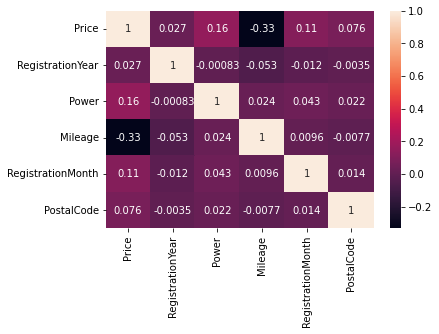

In [8]:

corr = data.drop(['NumberOfPictures'],axis=1).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True)



## Detailed dataset analysis and data preprocessing

### Target feature studying

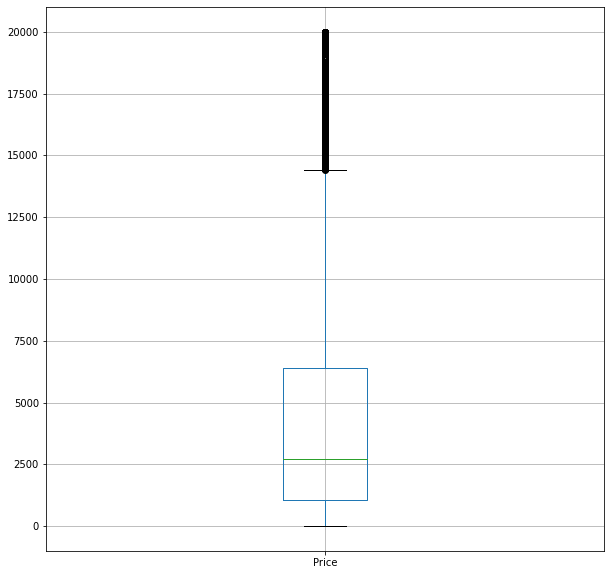

In [9]:
plt.figure(figsize=(10,10))
data[['Price']].boxplot()
plt.show()

Text(0, 0.5, 'Frequency')

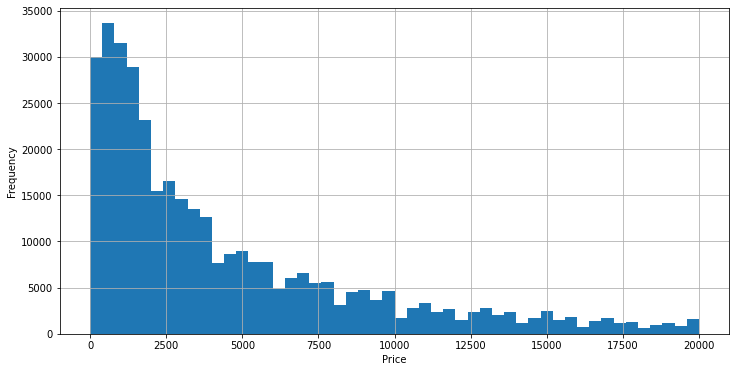

In [10]:
plt.figure(figsize=(12,6))
data['Price'].hist(bins=50) 
axis=plt.gca()
axis.set_xlabel('Price')
axis.set_ylabel('Frequency')

(0.0, 2500.0)

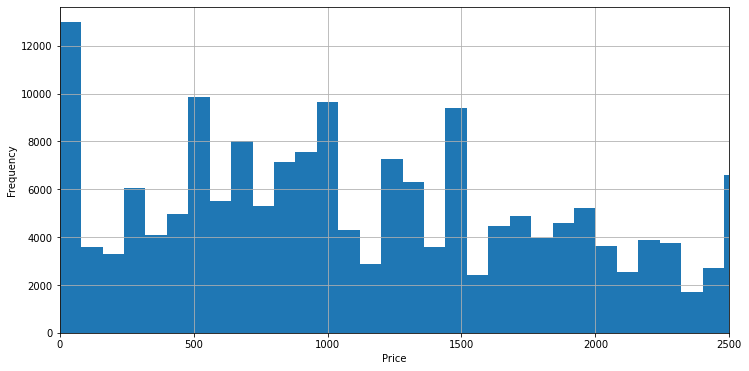

In [11]:
plt.figure(figsize=(12,6))
data['Price'].hist(bins=250) 
axis=plt.gca()
axis.set_xlabel('Price')
axis.set_ylabel('Frequency')
axis.set_xlim([0,2500])

(0.0, 500.0)

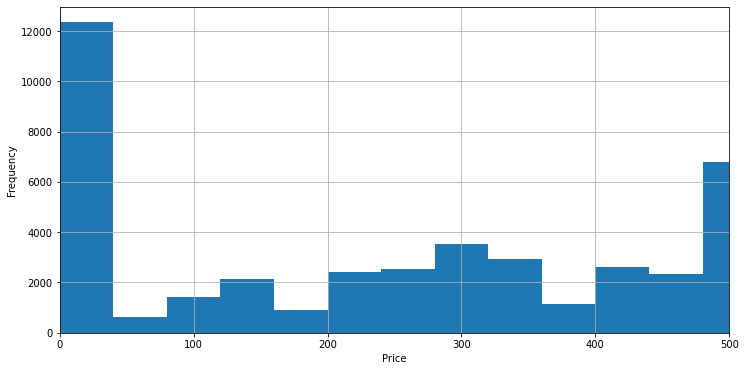

In [12]:
plt.figure(figsize=(12,6))
data['Price'].hist(bins=500) 
axis=plt.gca()
axis.set_xlabel('Price')
axis.set_ylabel('Frequency')
axis.set_xlim([0,500])

### Numerical features studying

Text(0, 0.5, 'Frequency')

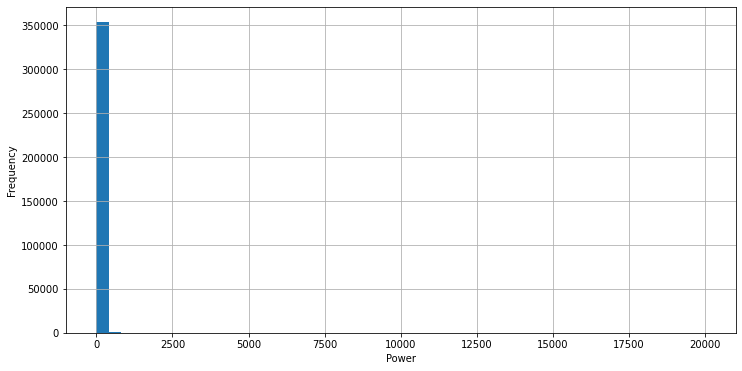

In [13]:
plt.figure(figsize=(12,6))
data['Power'].hist(bins=50) 
axis=plt.gca()
axis.set_xlabel('Power')
axis.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

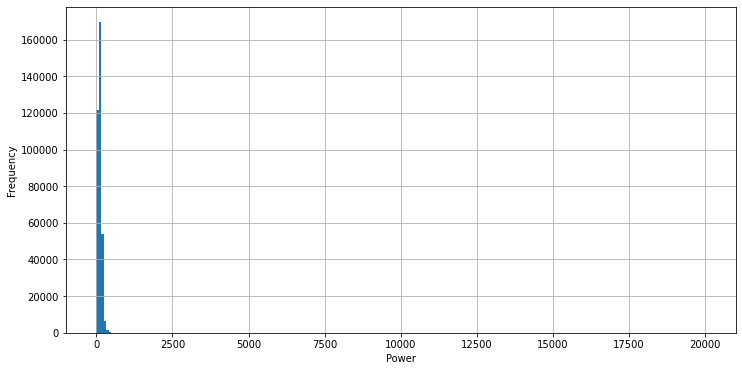

In [14]:
plt.figure(figsize=(12,6))
data['Power'].hist(bins=250) 
axis=plt.gca()
axis.set_xlabel('Power')
axis.set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

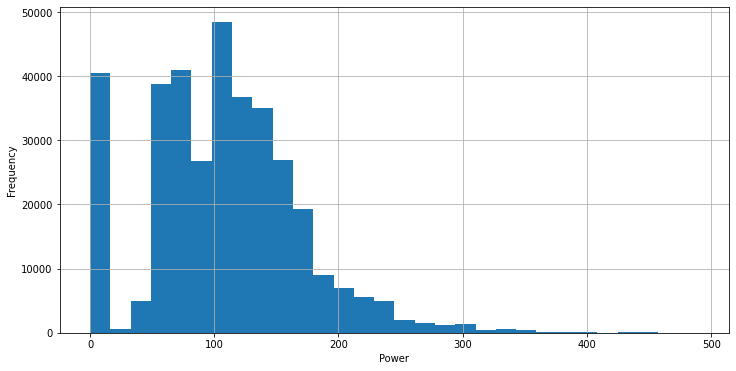

In [15]:
plt.figure(figsize=(12,6))
data['Power'][data['Power'] < 500].hist(bins=30) 
axis=plt.gca()
axis.set_xlabel('Power')
axis.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

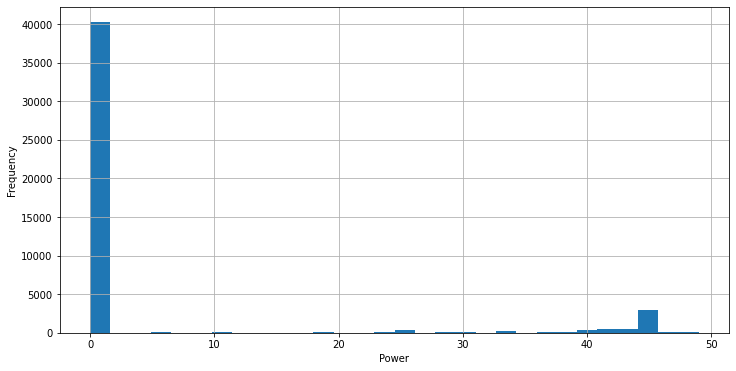

In [16]:
plt.figure(figsize=(12,6))
data['Power'][data['Power'] < 50].hist(bins=30) 
axis=plt.gca()
axis.set_xlabel('Power')
axis.set_ylabel('Frequency')


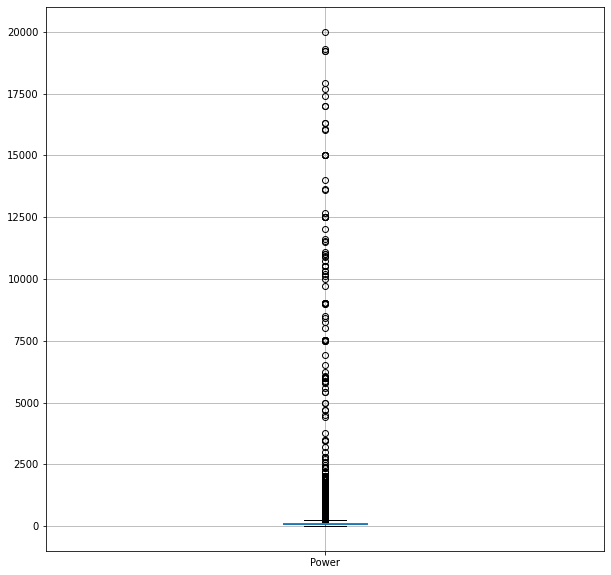

In [17]:
plt.figure(figsize=(10,10))
data[['Power']].boxplot()
plt.show()

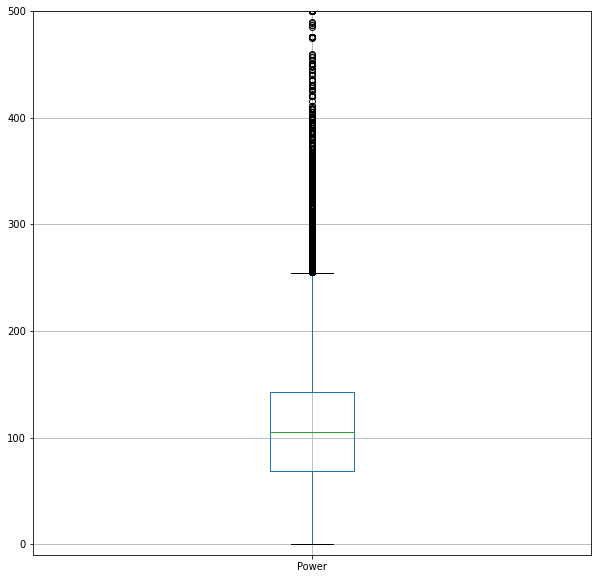

In [18]:
plt.figure(figsize=(10,10))
data[['Power']].boxplot()
ax=plt.gca()
ax.set_ylim(-10,500)
plt.show()

The abnormal values оf Power (0 horsepower and few thousands horsepower) will be replaced with median of train sample after spliting the dataset into train and test samples. 

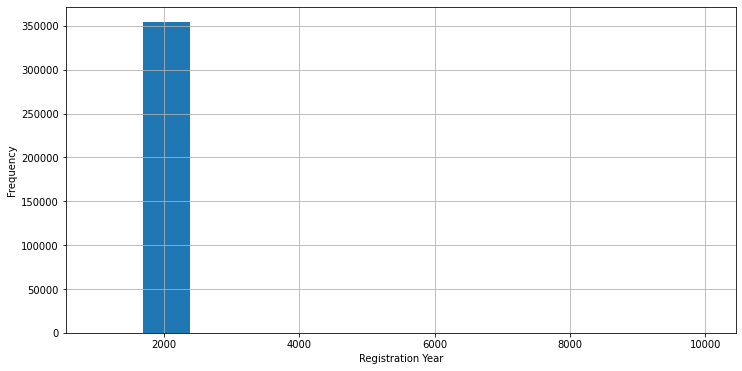

In [19]:
plt.figure(figsize=(12,6))
data['RegistrationYear'].hist(bins=13) 
axis=plt.gca()
axis.set_xlabel('Registration Year')
axis.set_ylabel('Frequency')
plt.show()

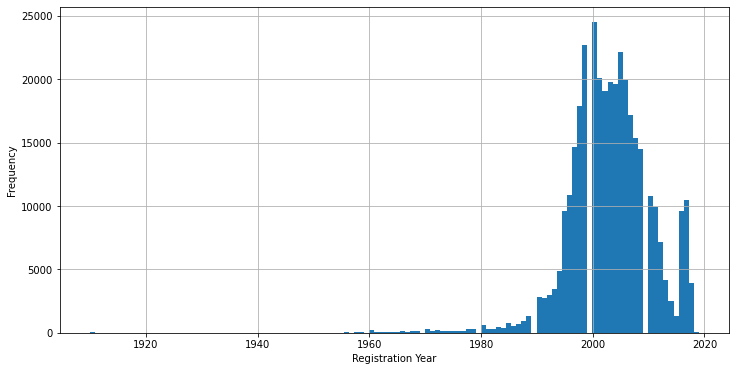

In [20]:
plt.figure(figsize=(12,6))
data['RegistrationYear'][(data['RegistrationYear']> 1900) & (data['RegistrationYear']< 2020)].hist(bins=120) 
axis=plt.gca()
axis.set_xlabel('Registration Year')
axis.set_ylabel('Frequency')
plt.show()

The abnormal values оf registraition year(before 1900 year and after 2016,the year of data collection) will be replaced with median of train sample after spliting the dataset into train and test samples.

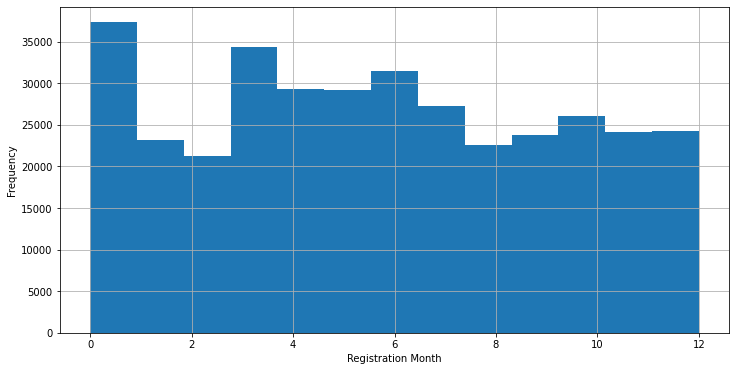

In [21]:
plt.figure(figsize=(12,6))
data['RegistrationMonth'].hist(bins=13) 
axis=plt.gca()
axis.set_xlabel('Registration Month')
axis.set_ylabel('Frequency')
plt.show()

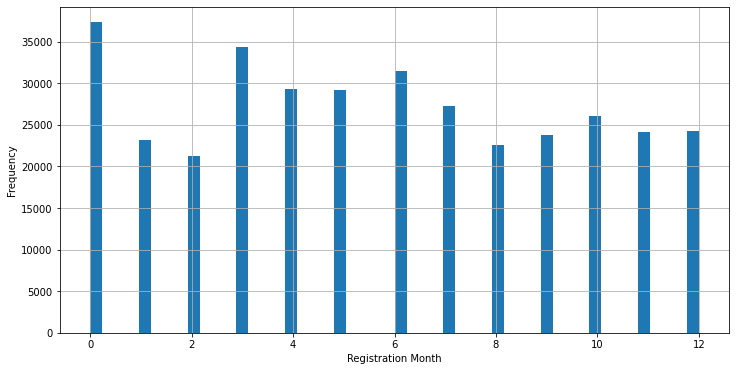

In [22]:
plt.figure(figsize=(12,6))
data['RegistrationMonth'].hist(bins=50) 
axis=plt.gca()
axis.set_xlabel('Registration Month')
axis.set_ylabel('Frequency')
plt.show()

Feature RegistrationMonth contains 0 values, it should be replaced with other values from 1 to 12 randomly

In [23]:
len(data.query('RegistrationMonth==0'))/len(data)


0.10540425375808832

In [24]:
data.loc[data['RegistrationMonth']==0, 'RegistrationMonth']=np.random.uniform(1,12,len(data.query('RegistrationMonth==0'))).astype('int')
data['RegistrationMonth']=data['RegistrationMonth'].astype('int')

In [25]:
data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,6.348146,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.332455,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,1.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


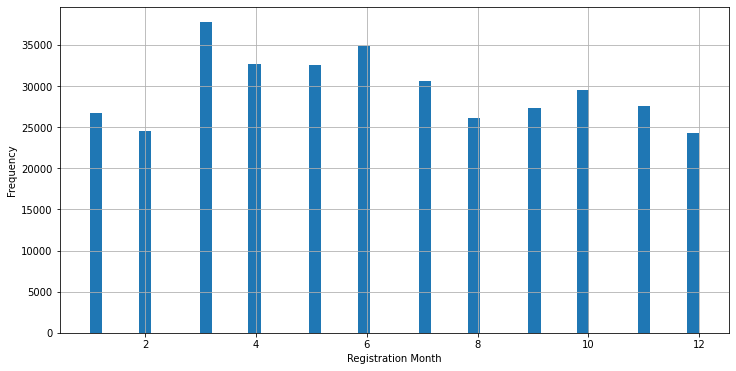

In [26]:
plt.figure(figsize=(12,6))
data['RegistrationMonth'].hist(bins=50) 
axis=plt.gca()
axis.set_xlabel('Registration Month')
axis.set_ylabel('Frequency')
plt.show()

### Engineering features 

Registration month and registration year are combined into new feature age in months.


In [27]:
data1=data.copy()
date_crawled = pd.to_datetime(data['DateCrawled'])
data1['AgeinMonths']=(date_crawled.dt.year - data['RegistrationYear'])*12+(date_crawled.dt.month - data['RegistrationMonth'])


In [28]:
data1['AgeinMonths']=data1['AgeinMonths'].astype('int')
data1.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode,AgeinMonths
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,6.348146,0.0,50508.689087,139.244632
std,4514.158514,90.227958,189.850405,37905.341530,3.332455,0.0,25783.096248,1082.742576
min,0.000000,1000.000000,0.000000,5000.000000,1.000000,0.0,1067.000000,-95804.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000,99.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000,153.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000,203.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000,12200.000000


(1.0, 2000.0)

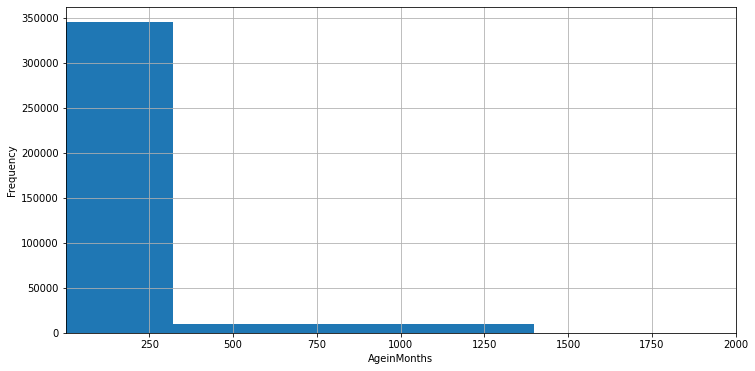

In [29]:
plt.figure(figsize=(12,6))
data1['AgeinMonths'].hist(bins=100) 
axis=plt.gca()
axis.set_xlabel('AgeinMonths')
axis.set_ylabel('Frequency')
axis.set_xlim([1,2000])

(1.0, 1000.0)

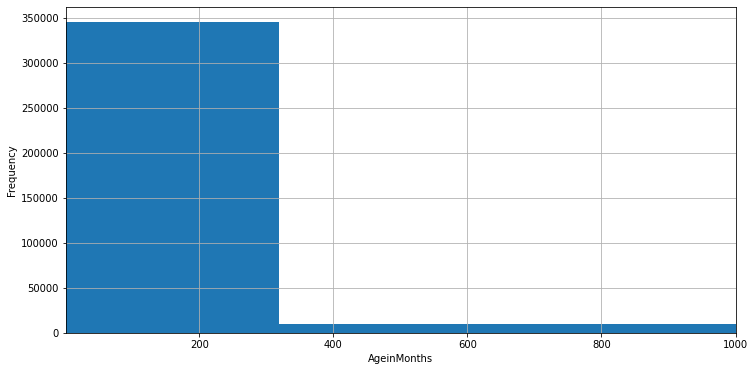

In [30]:
plt.figure(figsize=(12,6))
data1['AgeinMonths'].hist(bins=100) 
axis=plt.gca()
axis.set_xlabel('AgeinMonths')
axis.set_ylabel('Frequency')
axis.set_xlim([1,1000])

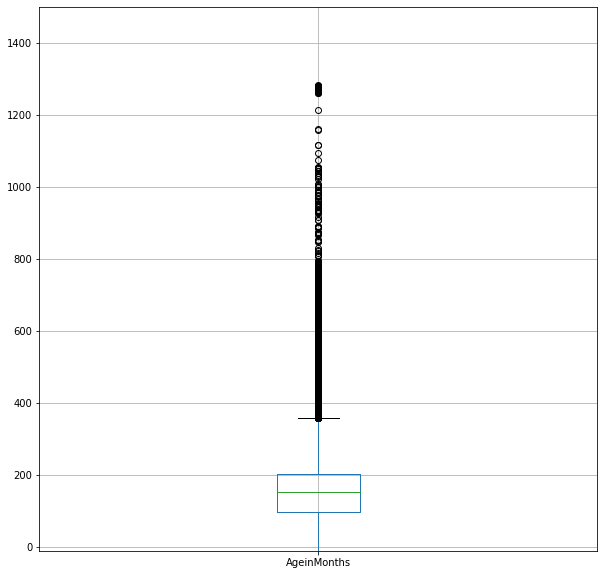

In [31]:
plt.figure(figsize=(10,10))
data1[['AgeinMonths']].boxplot()
ax=plt.gca()
ax.set_ylim(-10,1500)
plt.show()

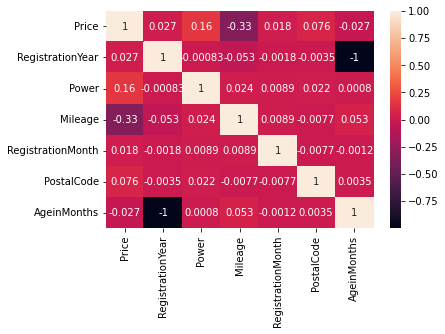

In [32]:
corr = data1.drop(['NumberOfPictures'],axis=1).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True)

In [33]:
data2=data1.copy()
data2['Brand_Model']=data2['Brand']+'_'+data2['Model']
display(data2['Brand_Model'])

0                volkswagen_golf
1                            NaN
2                     jeep_grand
3                volkswagen_golf
4                    skoda_fabia
                   ...          
354364           mitsubishi_colt
354365                       NaN
354366              smart_fortwo
354367    volkswagen_transporter
354368           volkswagen_golf
Name: Brand_Model, Length: 354369, dtype: object

### Categorical features preprocessing 

In [34]:
data2['Brand_Model']=data2['Brand_Model'].fillna('unknown')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
 16  AgeinMonths        3

In [35]:
data2['Brand_Model'].value_counts() 

volkswagen_golf                  29232
bmw_3er                          19761
unknown                          19705
volkswagen_polo                  13066
opel_corsa                       12570
                                 ...  
rover_freelander                     3
land_rover_range_rover_evoque        2
rover_discovery                      2
land_rover_serie_1                   2
rover_defender                       1
Name: Brand_Model, Length: 298, dtype: int64

In [36]:
data2['Brand_Model'][data2['Brand_Model'].str.contains('rover')].value_counts()

rover_other                      394
land_rover_freelander            215
land_rover_discovery              77
land_rover_range_rover            77
land_rover_defender               75
land_rover_range_rover_sport      54
land_rover_other                  18
land_rover_serie_2                 8
rover_rangerover                   4
land_rover_serie_3                 4
rover_freelander                   3
rover_discovery                    2
land_rover_range_rover_evoque      2
land_rover_serie_1                 2
rover_defender                     1
Name: Brand_Model, dtype: int64

In [37]:
for string1, string2 in zip([r'^rover_freelander', r'^rover_defender', r'^rover_rangerover', r'^rover_discovery'],['land_rover_freelander','land_rover_defender','land_rover_range_rover','land_rover_discovery']): 
  data2['Brand_Model']=data2['Brand_Model'].str.replace(string1,string2,regex=True)
  

In [38]:
data2['Brand_Model'][data2['Brand_Model'].str.contains('rover')].value_counts()

rover_other                      394
land_rover_freelander            218
land_rover_range_rover            81
land_rover_discovery              79
land_rover_defender               76
land_rover_range_rover_sport      54
land_rover_other                  18
land_rover_serie_2                 8
land_rover_serie_3                 4
land_rover_range_rover_evoque      2
land_rover_serie_1                 2
Name: Brand_Model, dtype: int64

In [39]:
for string in ['land_rover_other','land_rover_serie_2','land_rover_serie_3','land_rover_range_rover_evoque']:
  data2['Brand_Model']=data2['Brand_Model'].str.replace(string, 'rover_other')
data2['Brand_Model'][data2['Brand_Model'].str.contains('rover')].value_counts()


rover_other                     426
land_rover_freelander           218
land_rover_range_rover           81
land_rover_discovery             79
land_rover_defender              76
land_rover_range_rover_sport     54
land_rover_serie_1                2
Name: Brand_Model, dtype: int64

In [40]:
data2['Brand_Model'].value_counts().sort_index() 

alfa_romeo_145       49
alfa_romeo_147      572
alfa_romeo_156      629
alfa_romeo_159      212
alfa_romeo_other    521
                   ... 
volvo_v40           775
volvo_v50           255
volvo_v60            42
volvo_v70           633
volvo_xc_reihe      267
Name: Brand_Model, Length: 290, dtype: int64

rabota s kategorialnymi dannymi

In [41]:
for column in ['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired']:
  display(data2[column].value_counts())
  print('\n')
  

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

manual    268251
auto       66285
Name: Gearbox, dtype: int64

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

no     247161
yes     36054
Name: NotRepaired, dtype: int64

In [42]:
for column in ['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired']:
  data2[column]=data2[column].fillna('unknown')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        354369 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            354369 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           354369 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        354369 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
 16  AgeinMonths        3

### Dropping unnecessary features 

In [43]:
Features=data2.drop(['DateCrawled','RegistrationYear','Model','Brand','RegistrationMonth','DateCreated','NumberOfPictures','LastSeen','PostalCode','Price'],axis=1)
Features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   VehicleType  354369 non-null  object
 1   Gearbox      354369 non-null  object
 2   Power        354369 non-null  int64 
 3   Mileage      354369 non-null  int64 
 4   FuelType     354369 non-null  object
 5   NotRepaired  354369 non-null  object
 6   AgeinMonths  354369 non-null  int64 
 7   Brand_Model  354369 non-null  object
dtypes: int64(3), object(5)
memory usage: 21.6+ MB


### Creating samples and converting categorical data to numerical

In [44]:
Target=data2['Price'].copy()
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

Now we can replace abnormal values in power and age.

As it was mentioned before, after splitting dataset the abnormal values of some features will be replaced with median. 
Feature RegistrationYear contained abnormal values (before 1900 and after 2016, date of loading). The generated feature AgeinMonths has overtaken these abnormal values. It is necessary to improve this data to get better correclation with the target feature. AgeinMonth feature gets limit of values from 0 to 1400 (116 years)

In [45]:
Features_train.loc[(Features_train['Power']>2000) | (Features_train['Power'] < 10), 'Power'] = Features_train['Power'].median()
Features_train.loc[(Features_train['AgeinMonths']>1400) | (Features_train['AgeinMonths'] < 0), 'AgeinMonths'] = Features_train['AgeinMonths'].median()
Features_test.loc[(Features_test['Power']>2000) | (Features_test['Power'] < 10), 'Power'] = Features_train['Power'].median()
Features_test.loc[(Features_test['AgeinMonths']>1400) | (Features_test['AgeinMonths'] < 0), 'AgeinMonths'] = Features_train['AgeinMonths'].median()

In [46]:
Features_train.describe()
Features_test.describe()

,Power,Mileage,AgeinMonths
count,70874.000000,70874.000000,70874.000000
mean,119.827356,128054.505178,162.451788
std,61.583492,38085.195763,80.712253
min,10.000000,5000.000000,0.000000
25%,84.000000,125000.000000,113.000000
50%,105.000000,150000.000000,153.000000
75%,143.000000,150000.000000,203.000000
max,2000.000000,150000.000000,1282.000000


Check how have changed correlations after replacing abnormal values. 

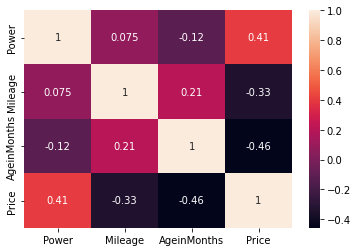

In [47]:
corr = pd.concat([Features_train, Target_train], axis=1).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True)

Correlation became correlations have become stronger. Mileage and age have negartive correlation and power have positive correlation as expected. 

### Handling categorical data

In [48]:
Encoder=skp.OneHotEncoder(handle_unknown='ignore')
Features_train_OHE=pd.DataFrame(Encoder.fit_transform(Features_train[['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired','Brand_Model']]).todense(), index=Features_train.index, columns=Encoder.get_feature_names())


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [49]:
Features_test_OHE=pd.DataFrame(Encoder.transform(Features_test[['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired','Brand_Model']]).todense(), index=Features_test.index, columns=Encoder.get_feature_names())


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [50]:
Features_test_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70874 entries, 294049 to 349739
Columns: 313 entries, x0_bus to x4_volvo_xc_reihe
dtypes: float64(313)
memory usage: 169.8 MB


In [51]:
Features_train_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283495 entries, 107156 to 121958
Columns: 313 entries, x0_bus to x4_volvo_xc_reihe
dtypes: float64(313)
memory usage: 679.1 MB


In [52]:
display(Features_train_OHE)

,x0_bus,x0_convertible,x0_coupe,x0_other,x0_sedan,x0_small,x0_suv,x0_unknown,x0_wagon,x1_auto,x1_manual,x1_unknown,x2_cng,x2_electric,x2_gasoline,x2_hybrid,x2_lpg,x2_other,x2_petrol,x2_unknown,x3_no,x3_unknown,x3_yes,x4_alfa_romeo_145,x4_alfa_romeo_147,x4_alfa_romeo_156,x4_alfa_romeo_159,x4_alfa_romeo_other,x4_alfa_romeo_spider,x4_audi_100,x4_audi_200,x4_audi_80,x4_audi_90,x4_audi_a1,x4_audi_a2,x4_audi_a3,x4_audi_a4,x4_audi_a5,x4_audi_a6,x4_audi_a8,...,x4_toyota_aygo,x4_toyota_corolla,x4_toyota_other,x4_toyota_rav,x4_toyota_verso,x4_toyota_yaris,x4_trabant_601,x4_trabant_other,x4_unknown,x4_volkswagen_amarok,x4_volkswagen_beetle,x4_volkswagen_bora,x4_volkswagen_caddy,x4_volkswagen_cc,x4_volkswagen_eos,x4_volkswagen_fox,x4_volkswagen_golf,x4_volkswagen_jetta,x4_volkswagen_kaefer,x4_volkswagen_lupo,x4_volkswagen_other,x4_volkswagen_passat,x4_volkswagen_phaeton,x4_volkswagen_polo,x4_volkswagen_scirocco,x4_volkswagen_sharan,x4_volkswagen_tiguan,x4_volkswagen_touareg,x4_volkswagen_touran,x4_volkswagen_transporter,x4_volkswagen_up,x4_volvo_850,x4_volvo_c_reihe,x4_volvo_other,x4_volvo_s60,x4_volvo_v40,x4_volvo_v50,x4_volvo_v60,x4_volvo_v70,x4_volvo_xc_reihe
107156,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323736,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,

In [53]:
columns_ser = pd.Series(Features_train_OHE.columns)
for i, col in enumerate(['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired','Brand_Model']):
     columns_ser = columns_ser.str.replace(f'x{i}', col)
Features_train_OHE.columns = list(columns_ser)

columns_ser = pd.Series(Features_test_OHE.columns)
for i, col in enumerate(['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired','Brand_Model']):
     columns_ser = columns_ser.str.replace(f'x{i}', col)
Features_test_OHE.columns = list(columns_ser)

print(Features_train_OHE.columns)
print(Features_test_OHE.columns)

Index(['VehicleType_bus', 'VehicleType_convertible', 'VehicleType_coupe',
       'VehicleType_other', 'VehicleType_sedan', 'VehicleType_small',
       'VehicleType_suv', 'VehicleType_unknown', 'VehicleType_wagon',
       'Gearbox_auto',
       ...
       'Brand_Model_volkswagen_up', 'Brand_Model_volvo_850',
       'Brand_Model_volvo_c_reihe', 'Brand_Model_volvo_other',
       'Brand_Model_volvo_s60', 'Brand_Model_volvo_v40',
       'Brand_Model_volvo_v50', 'Brand_Model_volvo_v60',
       'Brand_Model_volvo_v70', 'Brand_Model_volvo_xc_reihe'],
      dtype='object', length=313)
Index(['VehicleType_bus', 'VehicleType_convertible', 'VehicleType_coupe',
       'VehicleType_other', 'VehicleType_sedan', 'VehicleType_small',
       'VehicleType_suv', 'VehicleType_unknown', 'VehicleType_wagon',
       'Gearbox_auto',
       ...
       'Brand_Model_volkswagen_up', 'Brand_Model_volvo_850',
       'Brand_Model_volvo_c_reihe', 'Brand_Model_volvo_other',
       'Brand_Model_volvo_s60', 'Brand_Model_

In [54]:
Features_train_Final=pd.concat([Features_train[['AgeinMonths', 'Mileage','Power']],Features_train_OHE], axis=1)
Features_train_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283495 entries, 107156 to 121958
Columns: 316 entries, AgeinMonths to Brand_Model_volvo_xc_reihe
dtypes: float64(313), int64(3)
memory usage: 685.6 MB


In [55]:
Features_test_Final=pd.concat([Features_test[['AgeinMonths', 'Mileage','Power']],Features_test_OHE], axis=1)
Features_test_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70874 entries, 294049 to 349739
Columns: 316 entries, AgeinMonths to Brand_Model_volvo_xc_reihe
dtypes: float64(313), int64(3)
memory usage: 171.4 MB


### Standartization of features 

In [56]:
Scaler=skp.StandardScaler()
Features_train_Final_Scale=pd.DataFrame(Scaler.fit_transform(Features_train_Final),columns=Features_train_Final.columns, index=Features_train_Final.index)
Features_train_Final_Scale.describe()


,AgeinMonths,Mileage,Power,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon,Gearbox_auto,Gearbox_manual,Gearbox_unknown,FuelType_cng,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,NotRepaired_no,NotRepaired_unknown,NotRepaired_yes,Brand_Model_alfa_romeo_145,Brand_Model_alfa_romeo_147,Brand_Model_alfa_romeo_156,Brand_Model_alfa_romeo_159,Brand_Model_alfa_romeo_other,Brand_Model_alfa_romeo_spider,Brand_Model_audi_100,Brand_Model_audi_200,Brand_Model_audi_80,Brand_Model_audi_90,Brand_Model_audi_a1,Brand_Model_audi_a2,Brand_Model_audi_a3,Brand_Model_audi_a4,...,Brand_Model_toyota_aygo,Brand_Model_toyota_corolla,Brand_Model_toyota_other,Brand_Model_toyota_rav,Brand_Model_toyota_verso,Brand_Model_toyota_yaris,Brand_Model_trabant_601,Brand_Model_trabant_other,Brand_Model_unknown,Brand_Model_volkswagen_amarok,Brand_Model_volkswagen_beetle,Brand_Model_volkswagen_bora,Brand_Model_volkswagen_caddy,Brand_Model_volkswagen_cc,Brand_Model_volkswagen_eos,Brand_Model_volkswagen_fox,Brand_Model_volkswagen_golf,Brand_Model_volkswagen_jetta,Brand_Model_volkswagen_kaefer,Brand_Model_volkswagen_lupo,Brand_Model_volkswagen_other,Brand_Model_volkswagen_passat,Brand_Model_volkswagen_phaeton,Brand_Model_volkswagen_polo,Brand_Model_volkswagen_scirocco,Brand_Model_volkswagen_sharan,Brand_Model_volkswagen_tiguan,Brand_Model_volkswagen_touareg,Brand_Model_volkswagen_touran,Brand_Model_volkswagen_transporter,Brand_Model_volkswagen_up,Brand_Model_volvo_850,Brand_Model_volvo_c_reihe,Brand_Model_volvo_other,Brand_Model_volvo_s60,Brand_Model_volvo_v40,Brand_Model_volvo_v50,Brand_Model_volvo_v60,Brand_Model_volvo_v70,Brand_Model_volvo_xc_reihe
count,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,...,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05,2.834950e+05
mean,3.064763e-16,1.801438e-15,-4.931087e-16,1.331685e-14,3.635364e-15,6.082777e-15,-3.400290e-15,-8.642559e-16,-3.297684e-15,2.048724e-15,-2.521521e-15,-1.446668e-15,5.742923e-16,-3.934590e-16,1.474692e-15,-4.748706e-15,-3.565128e-15,1.854964e-15,-3.287574e-15,3.597601e-15,1.695504e-14,-2.913273e-15,2.787888e-15,-4.090243e-16,-1.371143e-15,-1.482430e-14,-5.956735e-16,1.280376e-15,5.368139e-15,5.811061e-16,1.244803e-15,-4.631793e-15,-7.107066e-16,-3.997672e-16,1.248864e-15,-4.289323e-17,1.742320e-15,-2.506199e-15,2.633310e-15,-5.048811e-15,...,2.110886e-15,-1.209610e-15,7.172503e-15,-4.104937e-15,1.984391e-15,1.809397e-15,3.377399e-15,8.261646e-16,1.160350e-15,-1.606411e-14,6.580860e-15,-2.554489e-15,1.231210e-15,-1.336381e-15,-3.135288e-15,1.213046e-14,-1.393948e-16,3.712304e-15,-7.893910e-15,-5.122637e-15,6.260218e-15,2.463722e-15,-3.654981e-15,-1.857351e-15,1.506575e-15,-2.938076e-15,-1.047147e-15,5.109567e-15,4.191520e-15,-2.315200e-15,2.992368e-15,-1.954829e-15,-1.019841e-16,5.789632e-15,-2.575763e-16,3.740073e-15,-8.992700e-16,-9.043725e-15,1.781923e-15,-8.977066e-16
std,1.000002e+00,1.000002e+00,1.000002e+0

In [57]:
Features_test_Final_Scale=pd.DataFrame(Scaler.transform(Features_test_Final),columns=Features_test_Final.columns, index=Features_test_Final.index)
Features_test_Final_Scale.describe()

,AgeinMonths,Mileage,Power,VehicleType_bus,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon,Gearbox_auto,Gearbox_manual,Gearbox_unknown,FuelType_cng,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,FuelType_unknown,NotRepaired_no,NotRepaired_unknown,NotRepaired_yes,Brand_Model_alfa_romeo_145,Brand_Model_alfa_romeo_147,Brand_Model_alfa_romeo_156,Brand_Model_alfa_romeo_159,Brand_Model_alfa_romeo_other,Brand_Model_alfa_romeo_spider,Brand_Model_audi_100,Brand_Model_audi_200,Brand_Model_audi_80,Brand_Model_audi_90,Brand_Model_audi_a1,Brand_Model_audi_a2,Brand_Model_audi_a3,Brand_Model_audi_a4,...,Brand_Model_toyota_aygo,Brand_Model_toyota_corolla,Brand_Model_toyota_other,Brand_Model_toyota_rav,Brand_Model_toyota_verso,Brand_Model_toyota_yaris,Brand_Model_trabant_601,Brand_Model_trabant_other,Brand_Model_unknown,Brand_Model_volkswagen_amarok,Brand_Model_volkswagen_beetle,Brand_Model_volkswagen_bora,Brand_Model_volkswagen_caddy,Brand_Model_volkswagen_cc,Brand_Model_volkswagen_eos,Brand_Model_volkswagen_fox,Brand_Model_volkswagen_golf,Brand_Model_volkswagen_jetta,Brand_Model_volkswagen_kaefer,Brand_Model_volkswagen_lupo,Brand_Model_volkswagen_other,Brand_Model_volkswagen_passat,Brand_Model_volkswagen_phaeton,Brand_Model_volkswagen_polo,Brand_Model_volkswagen_scirocco,Brand_Model_volkswagen_sharan,Brand_Model_volkswagen_tiguan,Brand_Model_volkswagen_touareg,Brand_Model_volkswagen_touran,Brand_Model_volkswagen_transporter,Brand_Model_volkswagen_up,Brand_Model_volvo_850,Brand_Model_volvo_c_reihe,Brand_Model_volvo_other,Brand_Model_volvo_s60,Brand_Model_volvo_v40,Brand_Model_volvo_v50,Brand_Model_volvo_v60,Brand_Model_volvo_v70,Brand_Model_volvo_xc_reihe
count,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,...,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000,70874.000000
mean,-0.004011,-0.005173,0.010599,-0.004772,0.004067,0.005966,-0.003410,-0.000703,-0.007939,0.000956,-0.000288,0.007739,0.002080,0.001589,-0.006476,0.003568,-0.003254,0.004997,-0.005126,-0.008794,0.005415,0.001536,-0.006856,0.003787,-0.007821,0.004625,0.013831,-0.005803,0.000084,0.001890,0.003624,-0.002092,0.005542,-0.001455,0.009107,-0.003646,-0.008027,-0.004082,0.008527,-0.005442,...,-0.007439,0.001289,0.005562,0.002833,-0.006889,0.005085,0.013448,-0.009111,-0.003613,-0.000521,0.001848,0.003080,-0.000790,0.000540,-0.001015,-0.004124,-0.000475,-0.001619,0.000300,-0.006326,-0.004731,0.004219,0.001590,-0.003943,-0.005481,0.003958,-0.000571,-0.003529,-0.005168,-0.003703,-0.003122,-0.004532,0.002599,-0.001567,-0.006073,-0.001506,0.001322,-0.002222,-0.006823,-0.000897
std,1.001981,1.005944,1.019011,0.992667,1.007755,1.012940,0.982457,0.999618,0.994759,1.002468,0.999638,1.006292,1.001674,0.999054,0.987437,1.044006,0.894456,1.002466,0.896794,0.964491,1.109336,0.999658,0.990345,0.998374,0.994137,1.006083,1.523899,0.926262,1.000997,1.038174,1.046525,0.954697,1.078833,0.894437,1.065942,0.889245,0.899089,0.935919,1.031286,0

## Model selection
### Training and evaluating potential models  

#### Linear regression

In [58]:
LRModel = Lasso(alpha=10.0)
print("Cross-validation RMSE: ", -cross_val_score(LRModel, Features_train_Final_Scale, Target_train ,cv=5,scoring='neg_root_mean_squared_error').mean())

Cross-validation RMSE:  2820.746007671604


In [59]:
LRModel.fit(Features_train_Final_Scale, Target_train)

Lasso(alpha=10.0)

In [60]:
LR_importance = pd.Series(LRModel.coef_, index=Features_train_Final_Scale.columns).sort_values()
print(LR_importance)

AgeinMonths               -1440.201763
Mileage                   -1292.954811
VehicleType_unknown        -340.713886
NotRepaired_yes            -228.733009
VehicleType_small          -217.531426
                              ...     
Gearbox_auto                375.598743
VehicleType_convertible     405.699914
NotRepaired_no              435.612938
FuelType_gasoline           573.141809
Power                       923.836995
Length: 316, dtype: float64


In general, numerical features influence on price, as expected. The main lowering factors are the mileage and age of car. Automatiс gearbox, the fact that there is no repair and gasoline engine lead to bigger price.

In [61]:
LRPred=LRModel.predict(Features_test_Final_Scale)


In [62]:
Features_test_Final_Scale.shape

(70874, 316)

In [63]:
LRPred.shape

(70874,)

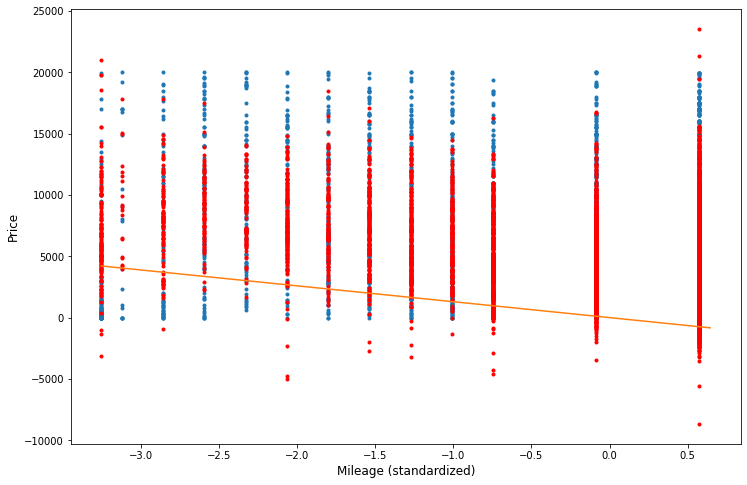

In [64]:
plt.figure(figsize=(12,8))
plt.plot(Features_test_Final_Scale['Mileage'].iloc[1::10], Target_test.iloc[1::10], linestyle='None', marker='.')
plt.plot(Features_test_Final_Scale['Mileage'].iloc[1::10], pd.Series(LRPred).iloc[1::10], linestyle='None', marker='.', color='red')
plt.plot(np.arange(Features_test_Final_Scale['Mileage'].min(), Features_test_Final_Scale['Mileage'].max() + 0.1, 0.1), LR_importance['Mileage']*np.arange(Features_test_Final_Scale['Mileage'].min(), Features_test_Final_Scale['Mileage'].max() + 0.1, 0.1))
ax = plt.gca()
ax.set_xlabel("Mileage (standardized)", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.show()

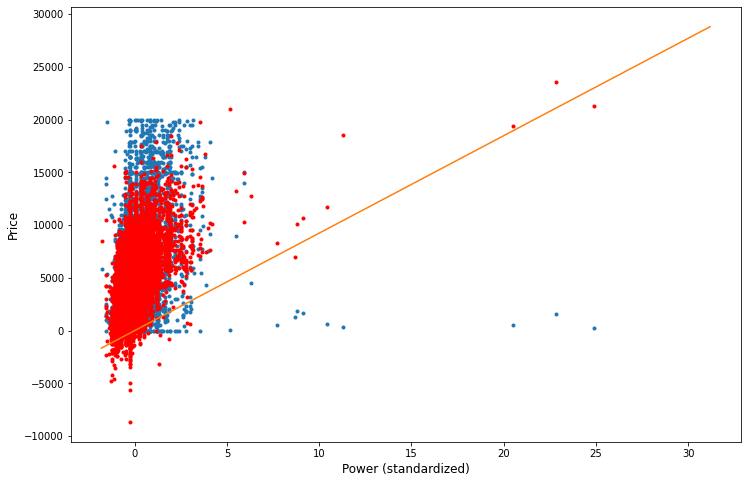

In [65]:
plt.figure(figsize=(12,8))
plt.plot(Features_test_Final_Scale['Power'].iloc[1::10], Target_test.iloc[1::10], linestyle='None', marker='.')
plt.plot(Features_test_Final_Scale['Power'].iloc[1::10], pd.Series(LRPred).iloc[1::10], linestyle='None', marker='.', color='red')
plt.plot(np.arange(Features_test_Final_Scale['Power'].min(), Features_test_Final_Scale['Power'].max() + 0.1, 0.1), LR_importance['Power']*np.arange(Features_test_Final_Scale['Power'].min(), Features_test_Final_Scale['Power'].max() + 0.1, 0.1))
ax = plt.gca()
ax.set_xlabel("Power (standardized)", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.show()

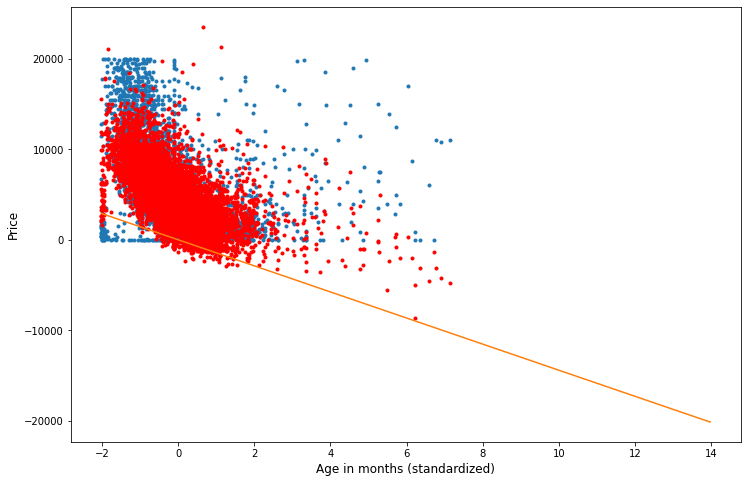

In [66]:
plt.figure(figsize=(12,8))
plt.plot(Features_test_Final_Scale['AgeinMonths'].iloc[1::10], Target_test.iloc[1::10], linestyle='None', marker='.')
plt.plot(Features_test_Final_Scale['AgeinMonths'].iloc[1::10], pd.Series(LRPred).iloc[1::10], linestyle='None', marker='.', color='red')
plt.plot(np.arange(Features_test_Final_Scale['AgeinMonths'].min(), Features_test_Final_Scale['AgeinMonths'].max() + 0.1, 0.1), LR_importance['AgeinMonths']*np.arange(Features_test_Final_Scale['AgeinMonths'].min(), Features_test_Final_Scale['AgeinMonths'].max() + 0.1, 0.1))
ax = plt.gca()
ax.set_xlabel("Age in months (standardized)", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.show()

In [67]:

rmse=sklm.mean_squared_error(Target_test, LRPred, squared=False )
print('rmse=', rmse) 

rmse= 2864.763409797051


In [68]:
LRPred=LRPred[Target_test!=0]
AbsolutePercentageError = np.abs(LRPred-Target_test[Target_test!=0])/Target_test[Target_test!=0]*100
print('Absolute Percentage Error: ', AbsolutePercentageError)

Absolute Percentage Error:  294049      45.623610
76415       30.458537
212563      57.948934
109307    3064.018571
248545     533.647479
             ...     
19396      110.615157
155875      25.236634
191963      22.424396
285317       4.499080
349739      59.725172
Name: Price, Length: 68688, dtype: float64


In [69]:
MeanAbsolutePercentageError = AbsolutePercentageError.median()
print("Median APE: ", MeanAbsolutePercentageError*100)


Median APE:  4006.7830964174605


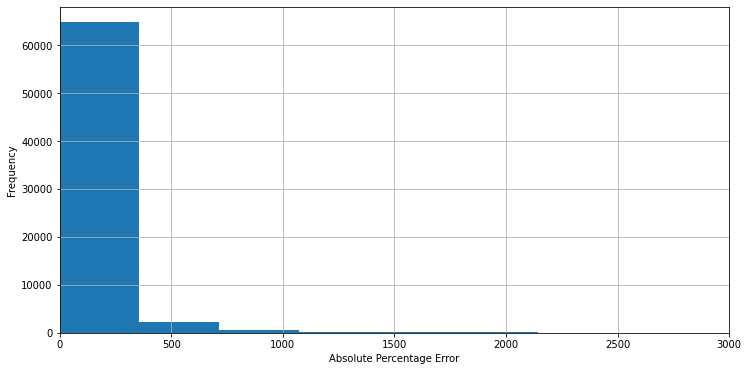

In [166]:
plt.figure(figsize=(12,6))
AbsolutePercentageError.hist(bins=5000)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error')
axis.set_ylabel('Frequency')
axis.set_xlim(0,3000)
plt.show()

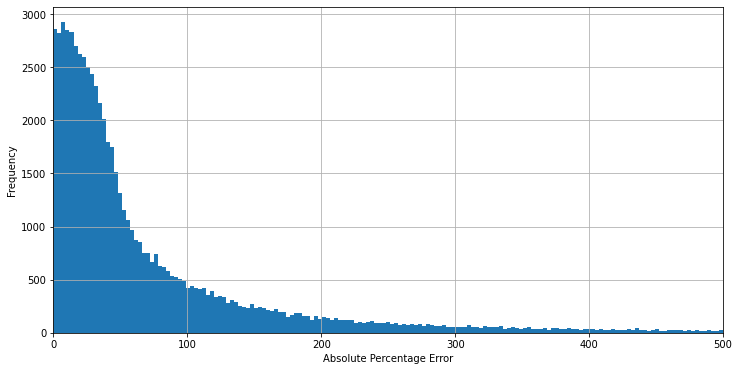

In [167]:
plt.figure(figsize=(12,6))
AbsolutePercentageError [AbsolutePercentageError < 1500].hist(bins=500)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error')
axis.set_ylabel('Frequency')
axis.set_xlim(0,500)
plt.show()

In [168]:
AbsolutePercentageError.name ="APE"
pd.DataFrame(AbsolutePercentageError).describe()

,APE
count,6.868800e+04
mean,1.183632e+03
std,2.538425e+04
min,6.842191e-04
25%,1.816950e+01
50%,4.006783e+01
75%,9.736432e+01
max,1.786349e+06


#### kNN Model

In [73]:
kNNModel=KNeighborsRegressor(7)
print("Cross-validation RMSE: ", -cross_val_score(kNNModel, Features_train_Final_Scale, Target_train ,cv=5,scoring='neg_root_mean_squared_error').mean())
kNNModel.fit(Features_train_Final_Scale, Target_train)

Cross-validation RMSE:  2068.210802942466


KNeighborsRegressor(n_neighbors=7)

In [74]:
kNNPred=kNNModel.predict(Features_test_Final_Scale)

In [75]:
rmsekNN=sklm.mean_squared_error(Target_test, kNNPred, squared=False )
print('rmsekNN=', rmsekNN) 

rmsekNN= 2047.3858271228257


In [76]:
kNNPred=kNNPred[Target_test!=0]
AbsolutePercentageErrorkNN=np.abs(kNNPred-Target_test[Target_test!=0])/Target_test[Target_test!=0]*100
print('Absolute Percentage Error:', AbsolutePercentageErrorkNN)

Absolute Percentage Error: 294049     19.148100
76415       1.403509
212563     13.263158
109307    389.142857
248545     68.571429
             ...    
19396      22.197069
155875     17.763348
191963     33.975155
285317     15.573441
349739      1.360544
Name: Price, Length: 68688, dtype: float64


In [77]:
MedianAbsolutePercentageErrorkNN = AbsolutePercentageErrorkNN.median()
print("Median APE: ", MedianAbsolutePercentageErrorkNN)

Median APE:  23.685902255639096


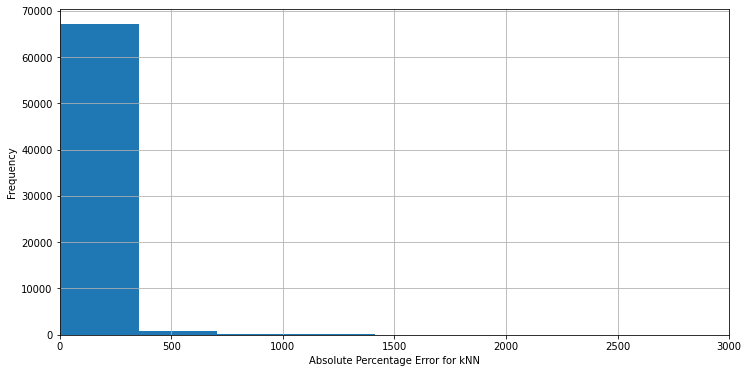

In [78]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorkNN.hist(bins=5000)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for kNN')
axis.set_ylabel('Frequency')
axis.set_xlim(0,3000)
plt.show()

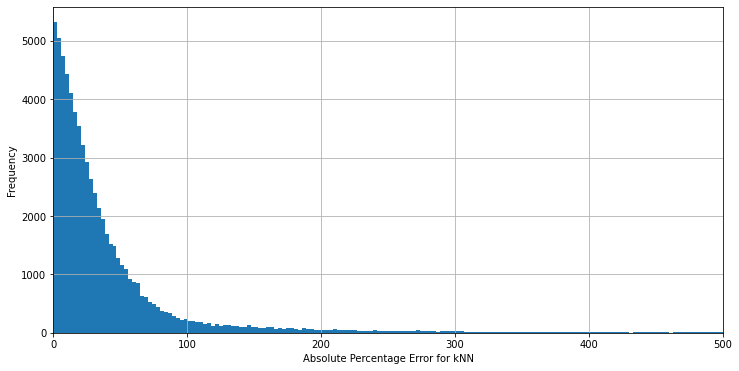

In [79]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorkNN[AbsolutePercentageErrorkNN < 1500].hist(bins=500)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for kNN')
axis.set_ylabel('Frequency')
axis.set_xlim(0,500)
plt.show()

In [169]:
AbsolutePercentageErrorkNN.name = 'APE'
AbsolutePercentageErrorkNN.describe()

count    6.868800e+04
mean     7.539015e+02
std      1.893997e+04
min      0.000000e+00
25%      1.017408e+01
50%      2.368590e+01
75%      4.842406e+01
max      1.768171e+06
Name: APE, dtype: float64

#### Decision Tree 

In [81]:
DTModel=DecisionTreeRegressor(max_depth=16,min_samples_split=32,random_state=42)
print("Cross-validation RMSE: ", -cross_val_score(DTModel, Features_train_Final_Scale, Target_train ,cv=5,scoring='neg_root_mean_squared_error').mean())


Cross-validation RMSE:  2043.4374608612666


In [82]:
DTModel.fit(Features_train_Final_Scale, Target_train)

DecisionTreeRegressor(max_depth=16, min_samples_split=32, random_state=42)

In [83]:
DTPred=DTModel.predict(Features_test_Final_Scale)

Plot first four levels of DecisionTree model.

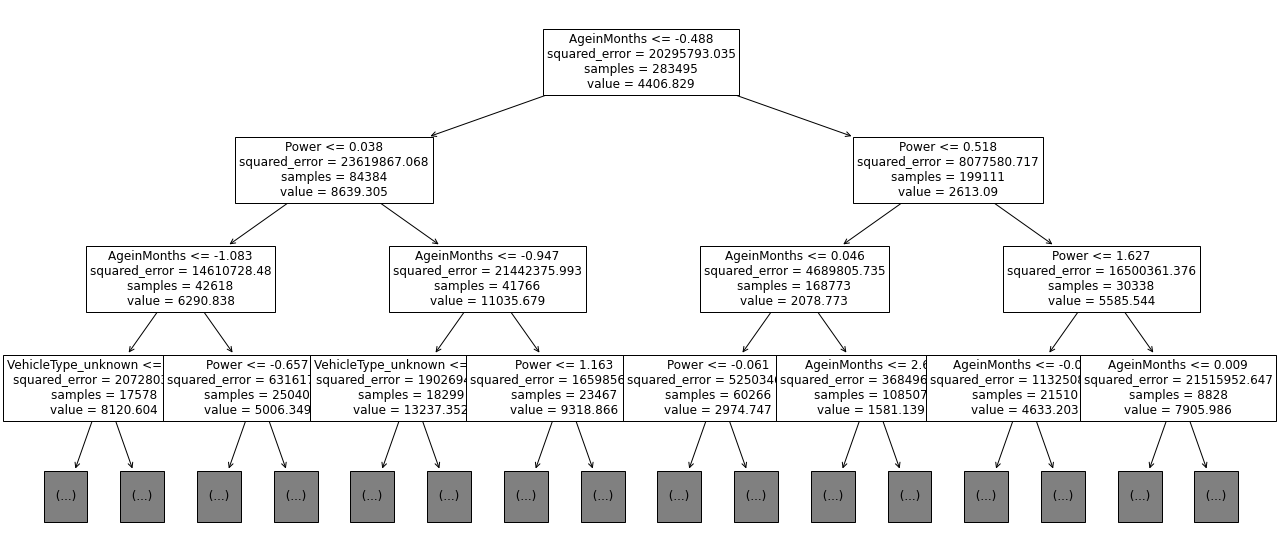

In [84]:
plt.figure(figsize=(22,10))
plot_tree(DTModel, max_depth=3, fontsize=12, feature_names = Features_test_Final_Scale.columns)
plt.show()

In [85]:
rmseDT=sklm.mean_squared_error(Target_test, DTPred, squared=False )
print('RMSE on test sample: ',  rmseDT) 

RMSE on test sample:  2059.8246096655944


In [86]:
DTPred=DTPred[Target_test!=0]
AbsolutePercentageErrorDT=np.abs(DTPred-Target_test[Target_test!=0])/Target_test[Target_test!=0]*100
print('Absolute Percentage Error:', AbsolutePercentageErrorDT)

Absolute Percentage Error: 294049     20.454241
76415      28.339541
212563      3.312419
109307    758.449553
248545     59.014304
             ...    
19396      36.185166
155875     64.935368
191963     27.879227
285317     55.470266
349739      1.190909
Name: Price, Length: 68688, dtype: float64


In [87]:
MedianAbsolutePercentageErrorDT = AbsolutePercentageErrorDT.median()
print("Median APE: ", MedianAbsolutePercentageErrorDT)

Median APE:  26.004044806973887


(0.0, 3000.0)

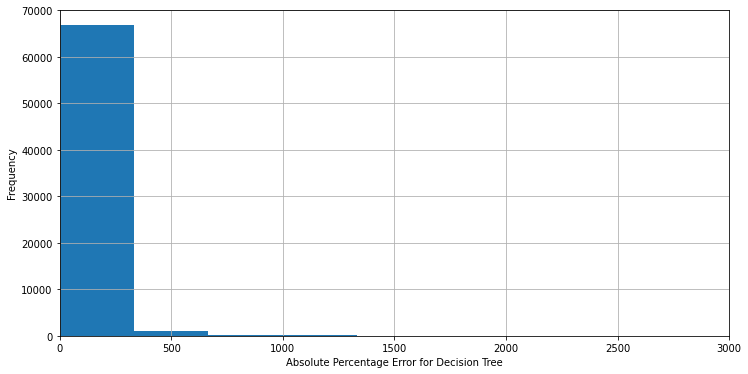

In [88]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorDT.hist(bins=5000)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Decision Tree')
axis.set_ylabel('Frequency')
axis.set_xlim(0,3000)

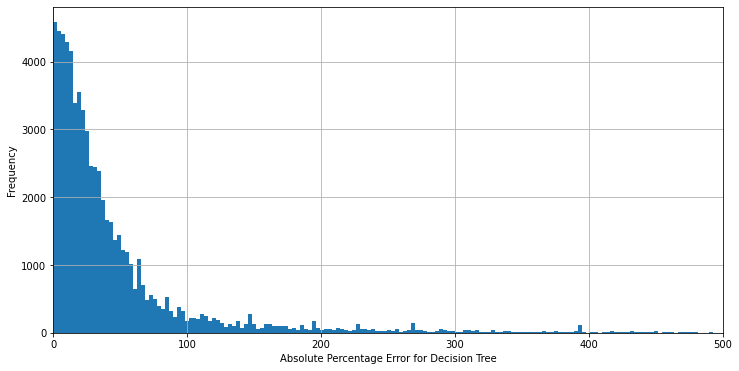

In [89]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorDT[AbsolutePercentageErrorDT < 1500].hist(bins=500)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Decision Tree')
axis.set_ylabel('Frequency')
axis.set_xlim(0,500)
plt.show()

In [170]:
AbsolutePercentageErrorDT.name = 'APE'
AbsolutePercentageErrorDT.describe()

count    6.868800e+04
mean     8.343004e+02
std      2.081991e+04
min      0.000000e+00
25%      1.148777e+01
50%      2.600404e+01
75%      5.299780e+01
max      1.667181e+06
Name: APE, dtype: float64

#### Random Forest

In [91]:
RFModel=RandomForestRegressor(n_estimators=100,max_depth=12,min_samples_split=16,random_state=42)
print("Cross-validation RMSE: ", -cross_val_score(RFModel, Features_train_Final_Scale, Target_train ,cv=5,scoring='neg_root_mean_squared_error').mean())

Cross-validation RMSE:  1993.1239935581075


In [92]:
RFModel.fit(Features_train_Final_Scale, Target_train)

RandomForestRegressor(max_depth=12, min_samples_split=16, random_state=42)

In [93]:
RFPred=RFModel.predict(Features_test_Final_Scale)

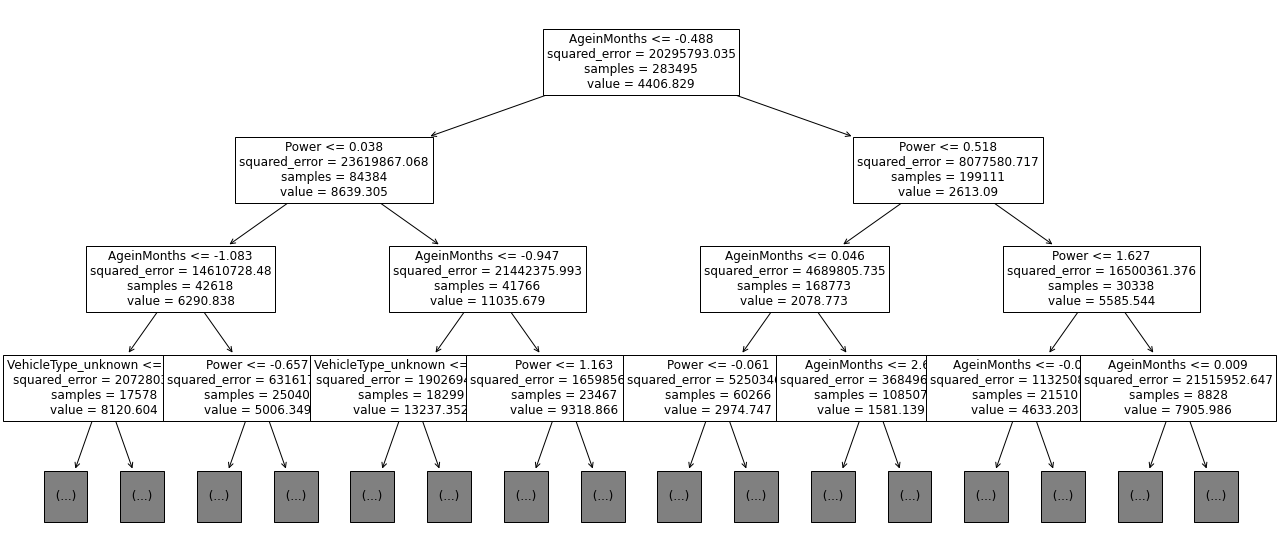

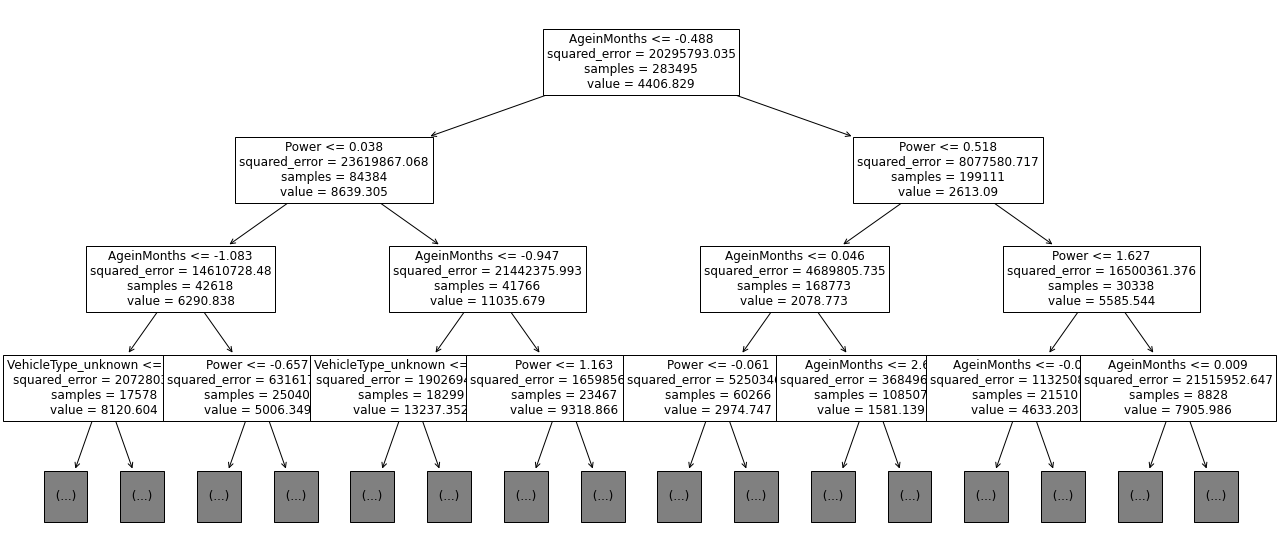

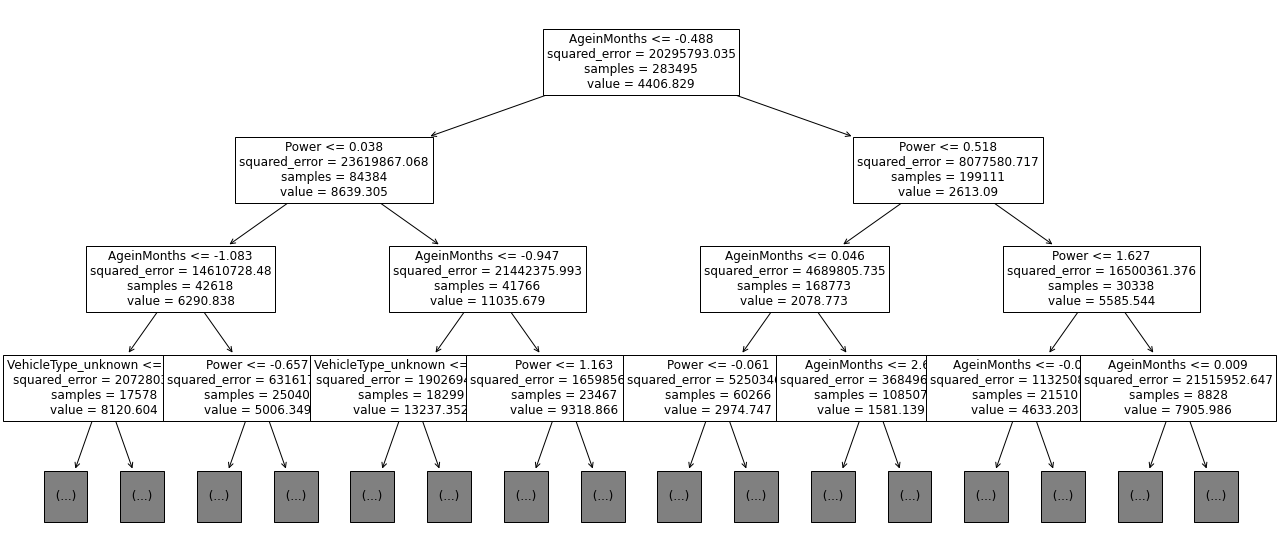

In [94]:
for tree in RFModel.estimators_[1:len(RFModel.estimators_):len(RFModel.estimators_)//3]:
    plt.figure(figsize=(22,10))
    plot_tree(DTModel, max_depth=3, fontsize=12, feature_names = Features_test_Final_Scale.columns)
    plt.show()

In [95]:
rmseRF=sklm.mean_squared_error(Target_test, RFPred, squared=False )
print('RMSE on test sample: ', rmseRF)

RMSE on test sample:  2010.1430243896832


In [96]:
RFPred=RFPred[Target_test!=0]
AbsolutePercentageErrorRF = np.abs(RFPred-Target_test[Target_test!=0])/Target_test[Target_test!=0]*100
print('Absolute Percentage Error:', AbsolutePercentageErrorRF)

Absolute Percentage Error: 294049      20.583145
76415        2.154521
212563       6.890632
109307    1096.251889
248545      62.914367
             ...     
19396       47.985997
155875      79.227486
191963      44.235604
285317      61.398340
349739      47.059579
Name: Price, Length: 68688, dtype: float64


In [97]:
MedianAbsolutePercentageErrorRF = AbsolutePercentageErrorRF.median()
print("Median APE: ", MedianAbsolutePercentageErrorRF)

Median APE:  26.73943629768155


(0.0, 3000.0)

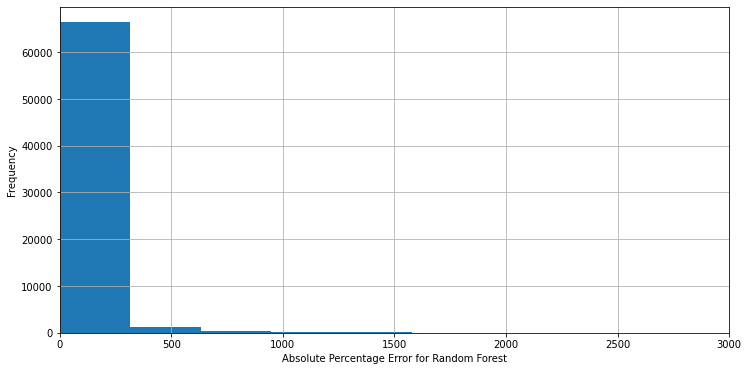

In [98]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorRF.hist(bins=5000)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Random Forest')
axis.set_ylabel('Frequency')
axis.set_xlim(0,3000)

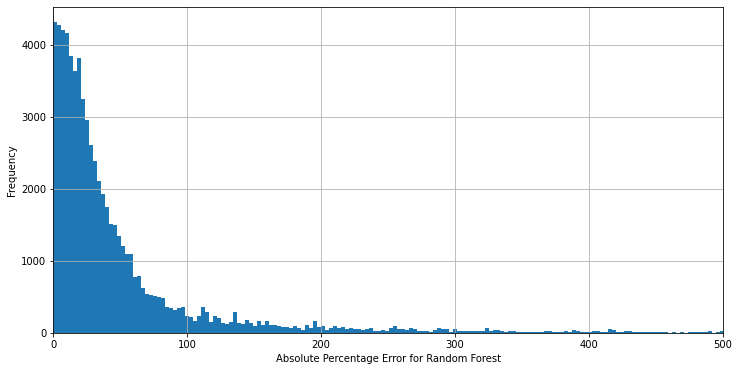

In [99]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorRF[AbsolutePercentageErrorRF < 1500].hist(bins=500)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Random Forest')
axis.set_ylabel('Frequency')
axis.set_xlim(0,500)
plt.show()

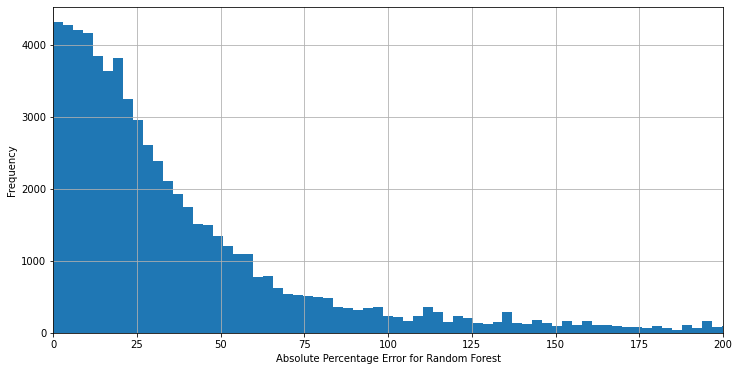

In [100]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorRF[AbsolutePercentageErrorRF < 1500].hist(bins=500)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Random Forest')
axis.set_ylabel('Frequency')
axis.set_xlim(0,200)
plt.show()

In [171]:
AbsolutePercentageErrorRF.name = 'APE'
AbsolutePercentageErrorRF.describe()

count    6.868800e+04
mean     8.701956e+02
std      2.012345e+04
min      4.920009e-04
25%      1.210611e+01
50%      2.673944e+01
75%      5.546452e+01
max      1.580742e+06
Name: APE, dtype: float64

#### Gradient Boosting

In [102]:
GBModel=CatBoostRegressor(iterations=1000,depth=12, learning_rate=0.05,random_state=42, verbose=1000)
print("Cross-validation RMSE: ",-cross_val_score(GBModel, Features_train_Final_Scale, Target_train ,cv=3,scoring='neg_root_mean_squared_error').mean())

0:	learn: 4357.1391886	total: 118ms	remaining: 1m 58s
999:	learn: 1592.4640021	total: 49.3s	remaining: 0us
0:	learn: 4342.3323720	total: 50.9ms	remaining: 50.9s
999:	learn: 1597.5772917	total: 50s	remaining: 0us
0:	learn: 4341.0293338	total: 49.1ms	remaining: 49s
999:	learn: 1601.8194072	total: 49.7s	remaining: 0us
Cross-validation RMSE:  1753.0147844228677


In [103]:
GBModel.fit(Features_train_Final_Scale, Target_train)

0:	learn: 4347.0679093	total: 57.2ms	remaining: 57.1s
999:	learn: 1622.4511217	total: 56.3s	remaining: 0us


In [104]:
GBPred=GBModel.predict(Features_test_Final_Scale)

In [105]:
rmseGB = sklm.mean_squared_error(Target_test, GBPred, squared=False )
print('RMSE on test sample: ',  rmseGB)

RMSE on test sample:  1760.7318900427988


In [106]:
GBPred=GBPred[Target_test!=0]
AbsolutePercentageErrorGB = np.abs(GBPred-Target_test[Target_test!=0])/Target_test[Target_test!=0]*100
print('Absolute Percentage Error:', AbsolutePercentageErrorGB)

Absolute Percentage Error: 294049     15.043745
76415       7.060491
212563     13.845240
109307    476.165906
248545    104.652255
             ...    
19396       1.040931
155875     19.084101
191963     33.487458
285317     33.040321
349739     15.279709
Name: Price, Length: 68688, dtype: float64


In [107]:
MedianAbsolutePercentageErrorGB = AbsolutePercentageErrorGB.median()
print("Median APE: ", MedianAbsolutePercentageErrorGB)

Median APE:  21.86179829696452


(0.0, 3000.0)

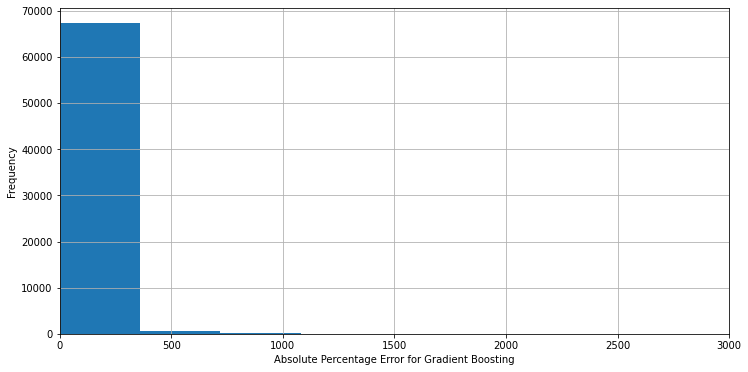

In [108]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorGB.hist(bins=5000)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Gradient Boosting')
axis.set_ylabel('Frequency')
axis.set_xlim(0,3000)

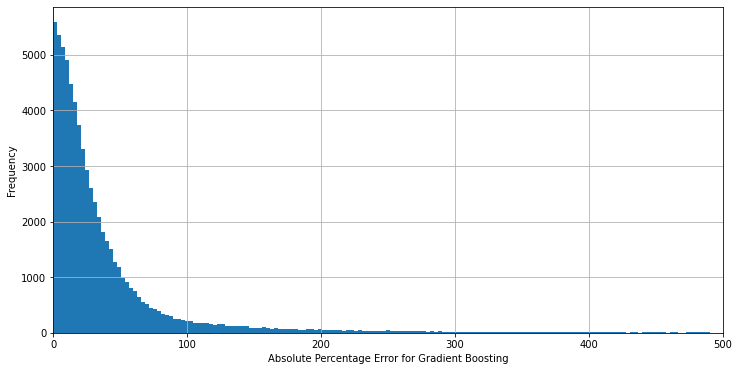

In [109]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorGB[AbsolutePercentageErrorGB < 1500].hist(bins=500)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Gradient Boosting')
axis.set_ylabel('Frequency')
axis.set_xlim(0,500)
plt.show()

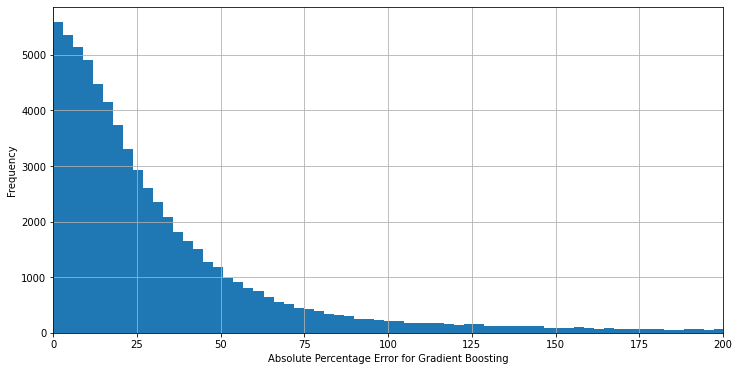

In [110]:
plt.figure(figsize=(12,6))
AbsolutePercentageErrorGB[AbsolutePercentageErrorGB < 1500].hist(bins=500)
axis=plt.gca()
axis.set_xlabel('Absolute Percentage Error for Gradient Boosting')
axis.set_ylabel('Frequency')
axis.set_xlim(0,200)
plt.show()

In [172]:
AbsolutePercentageErrorGB.name = 'APE'
AbsolutePercentageErrorGB.describe()

count    6.868800e+04
mean     7.794117e+02
std      1.900300e+04
min      6.094027e-04
25%      9.606169e+00
50%      2.186180e+01
75%      4.478976e+01
max      1.800735e+06
Name: APE, dtype: float64

### Models comparison

In [164]:
ComparisonRMSE=pd.Series([rmse, rmseDT, rmsekNN, rmseRF, rmseGB], name='RMSE')
ComparisonAbsolutePercentageErrorMedian=pd.Series([AbsolutePercentageError.median(), AbsolutePercentageErrorDT.median(), AbsolutePercentageErrorkNN.median(), AbsolutePercentageErrorRF.median(), AbsolutePercentageErrorGB.median()], name='Median AbsError, %')
ComparisonAbsolutePercentageErrorMean=pd.Series([AbsolutePercentageError.mean(), AbsolutePercentageErrorDT.mean(), AbsolutePercentageErrorkNN.mean(), AbsolutePercentageErrorRF.mean(), AbsolutePercentageErrorGB.mean()], name='Mean AbsError, %')
ComparisonAbsolutePercentageErrorMin=pd.Series([AbsolutePercentageError.min(), AbsolutePercentageErrorDT.min(), AbsolutePercentageErrorkNN.min(), AbsolutePercentageErrorRF.min(), AbsolutePercentageErrorGB.min()], name='Min AbsError, %')
ComparisonAbsolutePercentageErrorMax=pd.Series([AbsolutePercentageError.max(), AbsolutePercentageErrorDT.max(), AbsolutePercentageErrorkNN.max(), AbsolutePercentageErrorRF.max(), AbsolutePercentageErrorGB.max()], name='Max AbsError, %')
ComparisonDF=pd.DataFrame(pd.concat([ComparisonRMSE, ComparisonAbsolutePercentageErrorMedian, ComparisonAbsolutePercentageErrorMean, ComparisonAbsolutePercentageErrorMin, ComparisonAbsolutePercentageErrorMax], axis=1), columns=['RMSE','Median AbsError, %'])
ComparisonDF.index=['Linear Regression', 'Decision Tree', 'kNN', 'Random Forest', 'Gradient Boosting']
display(ComparisonDF)



,RMSE,"Median AbsError, %"
Linear Regression,2864.763410,40.067831
Decision Tree,2059.824610,26.004045
kNN,2047.385827,23.685902
Random Forest,2010.143024,26.739436
Gradient Boosting,1760.731890,21.861798


The Gradient Boosting model gives the best results both in RMSE and Absolute Relative Error.

## Hyperparameters optimization of the Gradient Booster Model

In [113]:
ParGrid={'iterations': [700, 1000, 1500], 'depth':[8, 10, 12], 'learning_rate':[0.01, 0.05, 0.1]}
GridSearch=GridSearchCV(CatBoostRegressor(verbose=100),ParGrid, cv=3, verbose=2, scoring = 'neg_root_mean_squared_error')
GridSearch.fit(Features_test_Final_Scale,Target_test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 4515.5696838	total: 6.79ms	remaining: 4.75s
100:	learn: 2818.4613014	total: 693ms	remaining: 4.11s
200:	learn: 2335.4852841	total: 1.37s	remaining: 3.4s
300:	learn: 2182.3597708	total: 2.02s	remaining: 2.68s
400:	learn: 2117.7867970	total: 2.66s	remaining: 1.98s
500:	learn: 2078.7523648	total: 3.29s	remaining: 1.31s
600:	learn: 2048.9539976	total: 3.93s	remaining: 648ms
699:	learn: 2024.8284773	total: 4.56s	remaining: 0us
[CV] END ........depth=8, iterations=700, learning_rate=0.01; total time=   4.9s
0:	learn: 4521.7314378	total: 6.95ms	remaining: 4.85s
100:	learn: 2812.0526814	total: 674ms	remaining: 4s
200:	learn: 2324.9809552	total: 1.35s	remaining: 3.34s
300:	learn: 2173.1110319	total: 2s	remaining: 2.65s
400:	learn: 2108.3754047	total: 2.63s	remaining: 1.96s
500:	learn: 2069.0821779	total: 3.27s	remaining: 1.3s
600:	learn: 2039.3358462	total: 3.91s	remaining: 644ms
699:	learn: 2015.7381342	total: 4.54s	remaini

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f751200b790>,
             param_grid={'depth': [8, 10, 12], 'iterations': [700, 1000, 1500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [114]:
print(GridSearch.best_params_)

{'depth': 10, 'iterations': 1500, 'learning_rate': 0.1}


In [115]:
display(pd.DataFrame(GridSearch.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.839986,0.022466,0.027761,0.001350,8,700,0.01,"{'depth': 8, 'iterations': 700, 'learning_rate...",-2070.294175,-2089.058927,-2063.311681,-2074.221595,10.871941,27
1,4.769614,0.047331,0.031420,0.002160,8,700,0.05,"{'depth': 8, 'iterations': 700, 'learning_rate...",-1890.757515,-1915.521483,-1886.007111,-1897.428703,12.939683,18
2,4.740306,0.026780,0.031509,0.000488,8,700,0.1,"{'depth': 8, 'iterations': 700, 'learning_rate...",-1846.455671,-1874.994069,-1847.874548,-1856.441429,13.131479,14
3,7.008311,0.251234,0.037373,0.005105,8,1000,0.01,"{'depth': 8, 'iterations': 1000, 'learning_rat...",-2026.793008,-2046.806144,-2020.491989,-2031.363713,11.218354,25
4,6.842110,0.054649,0.037400,0.007883,8,1000,0.05,"{'depth': 8, 'iterations': 1000, 'learning_rat...",-1864.946680,-1892.089334,-1861.950830,-1872.995614,13.556582,16
5,6.690416,0.015409,0.036404,0.003114,8,1000,0.1,"{'depth': 8, 'iterations': 1000, 'learning_rat...",-1832.941429,-1859.770224,-1833.708917,-1842.140190,12.470254,9
6,10.074707,0.060398,0.035286,0.001319,8,1500,0.01,"{'depth': 8, 'iterations': 1500, 'learning_rat...",-1975.924787,-1998.799397,-1970.013874,-1981.579353,12.413223,22
7,10.014386,0.023766,0.039361,0.000383,8,1500,0.05,"{'depth': 8, 'iterations': 1500, 'learning_rat...",-1841.497425,-1867.588010,-1839.732274,-1849.605903,12.735674,12
8,9.979260,0.044155,0.088324,0.066884,8,1500,0.1,"{'depth': 8, 'iterations': 1500, 'learning_rat...",-1822.264508,-1850.342562,-1826.157673,-1832.921581,12.420604,3
9,10.016462,0.058583,0.038469,0.000802,10,700,0.01,"{'depth': 10, 'iterations': 700, 'learning_rat...",-2036.924220,-2051.300146,-2025.331255,-2037.851874,10.622028,26


Training the selected model with the defined hyperparameters

In [163]:
FinalModel=CatBoostRegressor(iterations=1500, depth=12, learning_rate=0.1, verbose=100, random_state=123)
FinalModel.fit(Features_train_Final_Scale,Target_train)

0:	learn: 4190.7634430	total: 69ms	remaining: 1m 43s
100:	learn: 1868.8485844	total: 5.81s	remaining: 1m 20s
200:	learn: 1765.6999568	total: 11.4s	remaining: 1m 13s
300:	learn: 1702.4891562	total: 16.9s	remaining: 1m 7s
400:	learn: 1657.3382204	total: 22.6s	remaining: 1m 2s
500:	learn: 1620.7903419	total: 28.2s	remaining: 56.3s
600:	learn: 1589.5514898	total: 34.4s	remaining: 51.5s
700:	learn: 1561.3783338	total: 40.3s	remaining: 45.9s
800:	learn: 1536.8861622	total: 45.8s	remaining: 39.9s
900:	learn: 1516.3140122	total: 51.4s	remaining: 34.2s
1000:	learn: 1496.0610440	total: 57s	remaining: 28.4s
1100:	learn: 1477.8125651	total: 1m 2s	remaining: 22.7s
1200:	learn: 1460.6797003	total: 1m 8s	remaining: 17s
1300:	learn: 1445.0675972	total: 1m 13s	remaining: 11.3s
1400:	learn: 1431.5081326	total: 1m 19s	remaining: 5.61s
1499:	learn: 1418.5494718	total: 1m 25s	remaining: 0us


In [159]:
FinalModelPred=FinalModel.predict(Features_test_Final_Scale)


In [160]:
rmseFinal = sklm.mean_squared_error(Target_test, FinalModelPred, squared=False )
print('rmseFinal=', rmseFinal)

rmseFinal= 1710.7575108483766


In [119]:
FinalModelPred_not_0 =FinalModelPred[Target_test!=0].copy()
AbsolutePercentageErrorFinal = np.abs(FinalModelPred_not_0 - Target_test[Target_test!=0])/Target_test[Target_test!=0]*100
AbsoluteErrorFinal = np.abs(FinalModelPred_not_0 - Target_test[Target_test!=0])
print('Absolute Percentage Error','\n', AbsolutePercentageErrorFinal)
print('Absolute Error','\n', AbsoluteErrorFinal)

Absolute Percentage Error 
 294049     13.026921
76415       6.640610
212563      4.654373
109307    539.171133
248545    159.370037
             ...    
19396      15.640356
155875     30.809314
191963     30.213113
285317     29.548023
349739      3.758700
Name: Price, Length: 68688, dtype: float64
Absolute Error 
 294049    2605.253933
76415      946.286958
212563     132.649621
109307     269.585567
248545     796.850183
             ...     
19396      187.527871
155875     305.012205
191963    2084.704779
285317    2097.909648
349739     394.663512
Name: Price, Length: 68688, dtype: float64


In [121]:
display(AbsolutePercentageErrorFinal.describe())
display(AbsoluteErrorFinal.describe())

count    6.868800e+04
mean     7.645359e+02
std      1.933381e+04
min      4.307676e-04
25%      9.083425e+00
50%      2.085152e+01
75%      4.310624e+01
max      1.851451e+06
Name: Price, dtype: float64

count    68688.000000
mean       987.573363
std       1281.973317
min          0.012505
25%        247.979613
50%        575.032802
75%       1228.348856
max      19529.748704
Name: Price, dtype: float64

In [161]:
print(f'Mean Absolute Percentage Error: {AbsolutePercentageErrorFinal.mean():.2f}%')
print(f'Mean Absolute Error: {AbsoluteErrorFinal.mean():.2f}')
print(f'Median Absolute Percentage Error: {AbsolutePercentageErrorFinal.median():.2f}%')
print(f'Median Absolute Error: {AbsoluteErrorFinal.median():.2f}')

Mean Absolute Percentage Error: 764.54%
Mean Absolute Error: 987.57
Median Absolute Percentage Error: 20.85%
Median Absolute Error: 575.03


## Feature Importance Research


In [123]:
ImportantFeatures=pd.Series(FinalModel.get_feature_importance(), index=Features_train_Final_Scale.columns)
display(ImportantFeatures.sort_values(ascending=False).head(10))



AgeinMonths                           28.974868
Power                                 22.635168
Mileage                               10.579821
NotRepaired_no                         3.505445
VehicleType_unknown                    3.437502
FuelType_gasoline                      2.902616
VehicleType_convertible                2.669740
Brand_Model_volkswagen_transporter     2.015148
Gearbox_auto                           1.567535
NotRepaired_yes                        1.316461
dtype: float64

It is quite expected that the most important features are age of car, power of engine and mileage. But this representation does not give us an understanding if it is negative or positive influence. Shap library provides us feature importance based on Shapley values.

In [124]:
explainer = shap.TreeExplainer(FinalModel)
ImportantFeaturesAnalisys=explainer.shap_values(Features_test_Final_Scale)

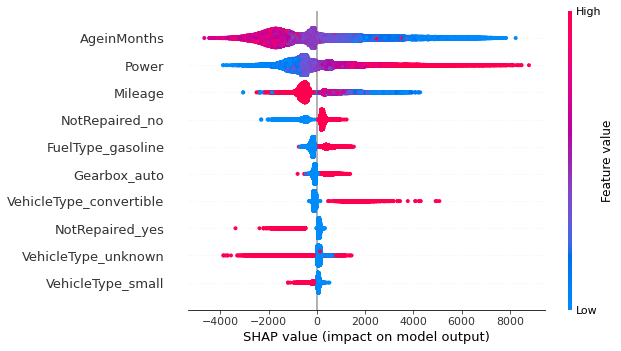

In [125]:
shap.summary_plot(ImportantFeaturesAnalisys, Features_test_Final_Scale, max_display=10)

Age of car and mileage have mainly negative influence, while engine power has positive influence.

## Error Analysis

In [126]:
AbsolutePercentageErrorFinal.name='AbsolutePercentageError'
AbsoluteErrorFinal.name='AbsoluteError'
ErrorAnalisys=pd.DataFrame(pd.concat([AbsoluteErrorFinal,AbsolutePercentageErrorFinal, Target_test], axis=1),columns=['AbsoluteError', 'AbsolutePercentageError', 'Price'])
display(ErrorAnalisys)

,AbsoluteError,AbsolutePercentageError,Price
0,360.869325,75.181109,480
2,1528.619219,15.598155,9800
7,NaN,NaN,0
16,645.825507,215.275169,300
24,350.827742,70.165548,500
...,...,...,...
354339,279.008245,7.246967,3850
354342,54.921730,9.153622,600
354350,466.718086,33.337006,1400
354352,1083.573878,16.670367,6500


In [127]:
ErrorAnalisys['PriceCategory']=pd.cut(ErrorAnalisys['Price'],bins=100)
display(ErrorAnalisys)

,AbsoluteError,AbsolutePercentageError,Price,PriceCategory
0,360.869325,75.181109,480,"(400.0, 600.0]"
2,1528.619219,15.598155,9800,"(9600.0, 9800.0]"
7,NaN,NaN,0,"(-20.0, 200.0]"
16,645.825507,215.275169,300,"(200.0, 400.0]"
24,350.827742,70.165548,500,"(400.0, 600.0]"
...,...,...,...,...
354339,279.008245,7.246967,3850,"(3800.0, 4000.0]"
354342,54.921730,9.153622,600,"(400.0, 600.0]"
354350,466.718086,33.337006,1400,"(1200.0, 1400.0]"
354352,1083.573878,16.670367,6500,"(6400.0, 6600.0]"


In [128]:
ErrorComparisonPrice=ErrorAnalisys[['PriceCategory', 'AbsoluteError','AbsolutePercentageError']].groupby('PriceCategory').agg(['mean','median','min','max'])
display(ErrorComparisonPrice)

AbsoluteError               ... AbsolutePercentageError              
                            mean       median  ...                     min           max
PriceCategory                                  ...                                      
(-20.0, 200.0]        895.229405   446.565193  ...                1.328513  1.851451e+06
(200.0, 400.0]        570.539912   334.149736  ...                0.010979  7.784926e+03
(400.0, 600.0]        480.131300   309.430150  ...                0.063103  3.327853e+03
(600.0, 800.0]        453.705349   285.825156  ...                0.001565  1.936222e+03
(800.0, 1000.0]       464.295116   297.311214  ...                0.060992  6.084033e+02
(1000.0, 1200.0]      495.711854   330.451397  ...                0.018000  6.555203e+02
(1200.0, 1400.0]      485.988550   341.129189  ...                0.032952  4.605527e+02
(1400.0, 1600.0]      561.860337   383.507253  ...                0.009367  7.587116e+02
(1600.0, 1800.0]      574.012921   412.995322  ...                0.011883  3.906613e+02
(1800.0, 2000.0]      666.693306   480.948388  ...                0.004082  6.588143e+02
(2000.0, 2200.0]      652.177998   489.019485  ...                0.017468  3.135915e+02
(2200.0, 2400.0]      698.610259   534.878848  ...                0.061710  4.511308e+02
(2400.0, 2600.0]      739.464623   563.489992  ...                0.009159  4.298102e+02
(2600.0, 2800.0]      766.705210   556.710496  ...                0.043067  3.044961e+02
(2800.0, 3000.0]      805.799148   618.681768  ...                0.010842  2.701498e+02
(3000.0, 3200.0]      781.771606   576.447407  ...                0.023753  1.758637e+02
(3200.0, 3400.0]      819.027296   595.757479  ...                0.053057  2.688457e+02
(3400.0, 3600.0]      928.995026   718.920418  ...                0.014051  2.184288e+02
(3600.0, 3800.0]      907.231972   669.837607  ...                0.014752  1.750927e+02
(3800.0, 4000.0]     1001.970199   718.232860  ...                0.033257  2.366904e+02
(4000.0, 4200.0]     1051.471576   689.839816  ...                0.059478  2.121436e+02
(4200.0, 4400.0]      939.889214   682.747887  ...                0.078549  1.653906e+02
(4400.0, 4600.0]     1088.742803   809.815847  ...                0.006691  1.762359e+02
(4600.0, 4800.0]     1015.015382   748.942066  ...                0.005787  2.021757e+02
(4800.0, 5000.0]     1163.286048   837.549237  ...                0.023917  2.318641e+02
(5000.0, 5200.0]     1068.220404   785.778223  ...                0.038739  1.287582e+02
(5200.0, 5400.0]     1072.380635   780.987459  ...                0.021820  1.821741e+02
(5400.0, 5600.0]     1195.983296   886.724763  ...                0.038859  1.399725e+02
(5600.0, 5800.0]     1149.845496   789.722248  ...                0.183411  1.185068e+02
(5800.0, 6000.0]     1318.487228   971.172344  ...                0.012812  1.790199e+02
(6000.0, 6200.0]     1070.893985   767.351974  ...                0.121587  9.810131e+01
(6200.0, 6400.0]     1070.682080   840.638561  ...                0.047338  9.262914e+01
(6400.0, 6600.0]     1279.251426   934.362918  ...                0.045368  9.318812e+01
(6600.0, 6800.0]     1165.902782   888.316419  ...                0.068138  9.062933e+01
(6800.0, 7000.0]     1345.764915  1019.574998  ...                0.009735  1.410289e+02
(7000.0, 7200.0]     1238.860802   887.243354  ...                0.144289  9.377276e+01
(7200.0, 7400.0]     1230.286302   804.990354  ...                0.189834  1.268007e+02
(7400.0, 7600.0]     1285.526476   955.719220  ...                0.002328  1.183520e+02
(7600.0, 7800.0]     1268.628723   968.167195  ...                0.119950  7.864479e+01
(7800.0, 8000.0]     1424.870456  1051.469652  ...                0.027698  1.382187e+02
(8000.0, 8200.0]     1383.772833  1001.974472  ...                0.140944  1.263049e+02
(8200.0, 8400.0]     1289.333936   978.296045  ...                0.136695  8.513737e+01
(8400.0, 8600.

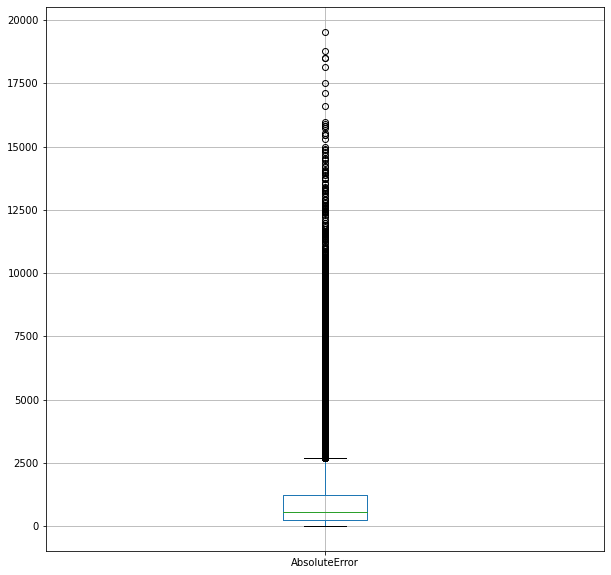

In [129]:
plt.figure(figsize=(10,10))
(ErrorAnalisys[['AbsoluteError']]).boxplot(column=['AbsoluteError'])
plt.show()

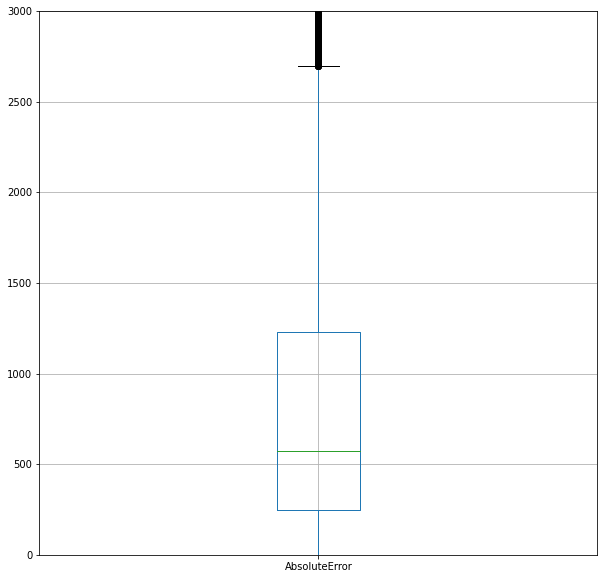

In [130]:
plt.figure(figsize=(10,10))
boxplot = (ErrorAnalisys[['AbsoluteError']]).boxplot(column=['AbsoluteError'])
ax=plt.gca()
ax.set_ylim(0,3000)
plt.show()

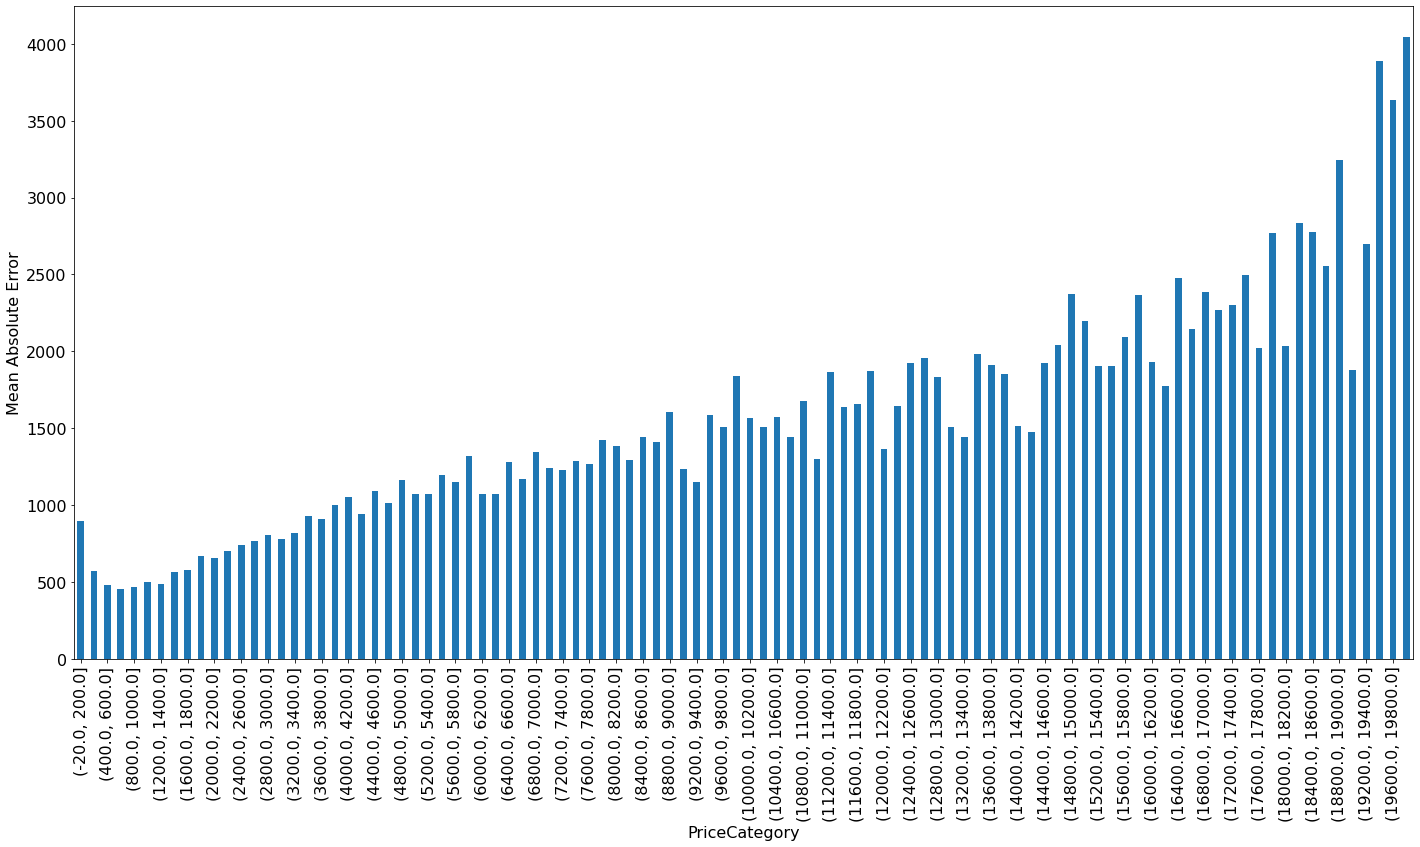

In [151]:
plt.figure(figsize=(24,12))
ErrorComparisonPrice[('AbsoluteError','mean')].plot(kind='bar')
ax = plt.gca()
ax.set_ylabel("Mean Absolute Error", fontsize=16)
ax.xaxis.label.set_size(16)
ticks = ax.get_xticks()
t_lables = ax.get_xticklabels()
ticks = [x for i, x in enumerate(ticks) if not i%2]
t_lables = [x for i,x in enumerate(t_lables) if not i%2]
ax.set_xticks(ticks)
ax.set_xticklabels(t_lables)
ax.tick_params(labelsize=16)
plt.show()


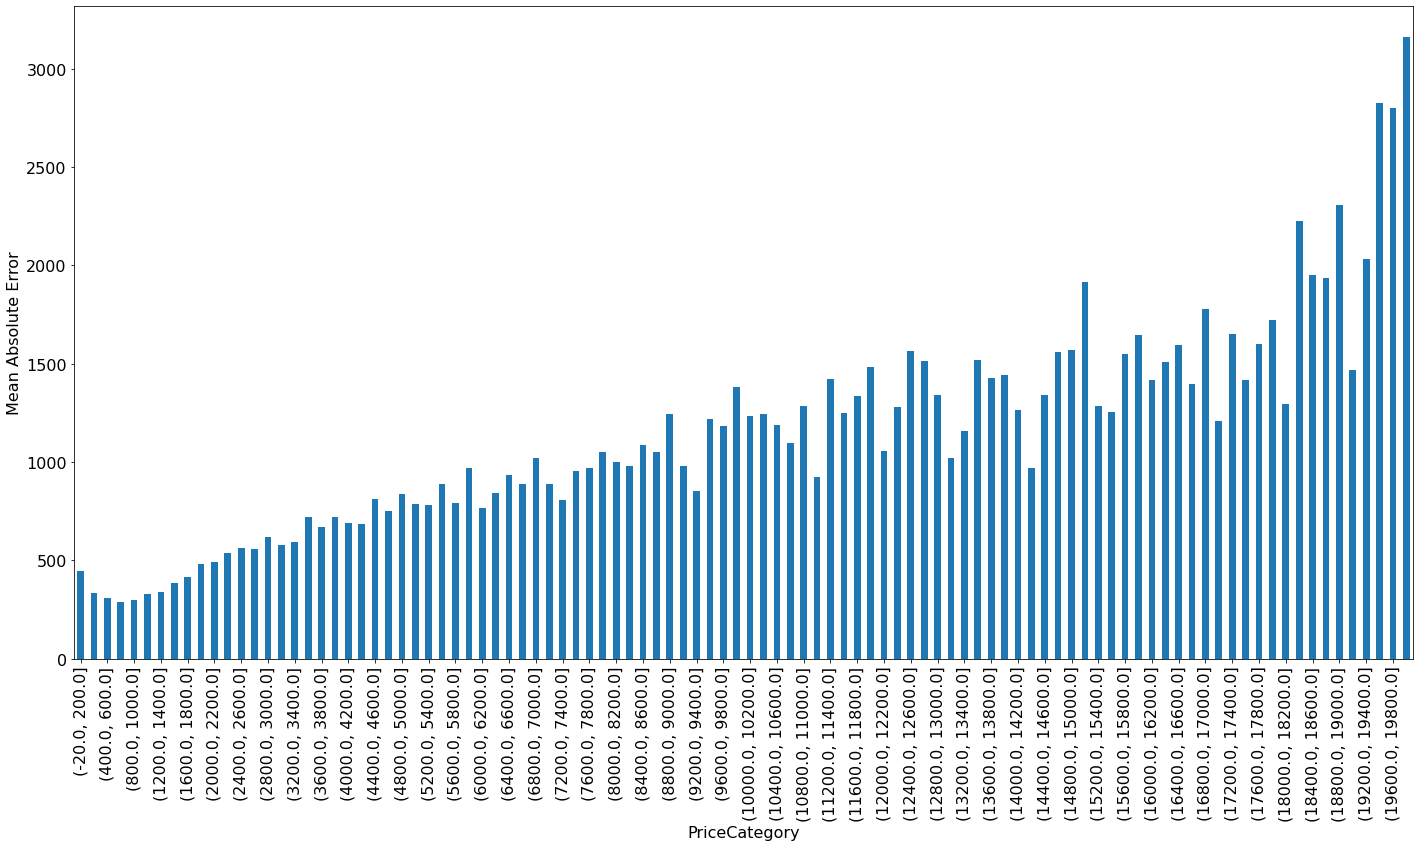

In [152]:
plt.figure(figsize=(24,12))
ErrorComparisonPrice[('AbsoluteError','median')].plot(kind='bar')
ax = plt.gca()
ax.set_ylabel("Median Absolute Error", fontsize=16)
ax.xaxis.label.set_size(16)
ticks = ax.get_xticks()
t_lables = ax.get_xticklabels()
ticks = [x for i, x in enumerate(ticks) if not i%2]
t_lables = [x for i,x in enumerate(t_lables) if not i%2]
ax.set_xticks(ticks)
ax.set_xticklabels(t_lables)
ax.tick_params(labelsize=16)
plt.show()

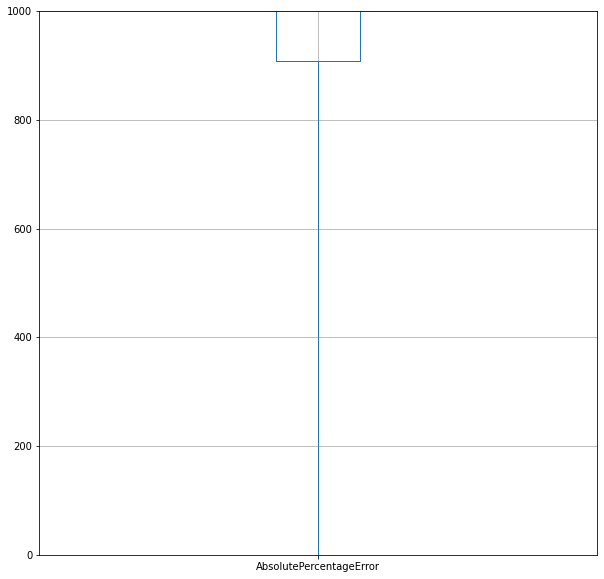

In [133]:
plt.figure(figsize=(10,10))
(ErrorAnalisys[['AbsolutePercentageError']]*100).boxplot(column=['AbsolutePercentageError'])
ax=plt.gca()
ax.set_ylim(0,1000)
plt.show()

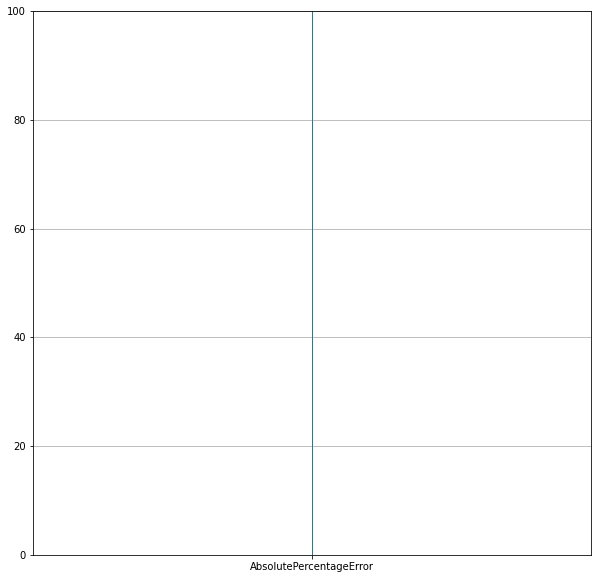

In [134]:
plt.figure(figsize=(10,10))
(ErrorAnalisys[['AbsolutePercentageError']]*100).boxplot(column=['AbsolutePercentageError'])
ax=plt.gca()
ax.set_ylim(0,100)
plt.show()

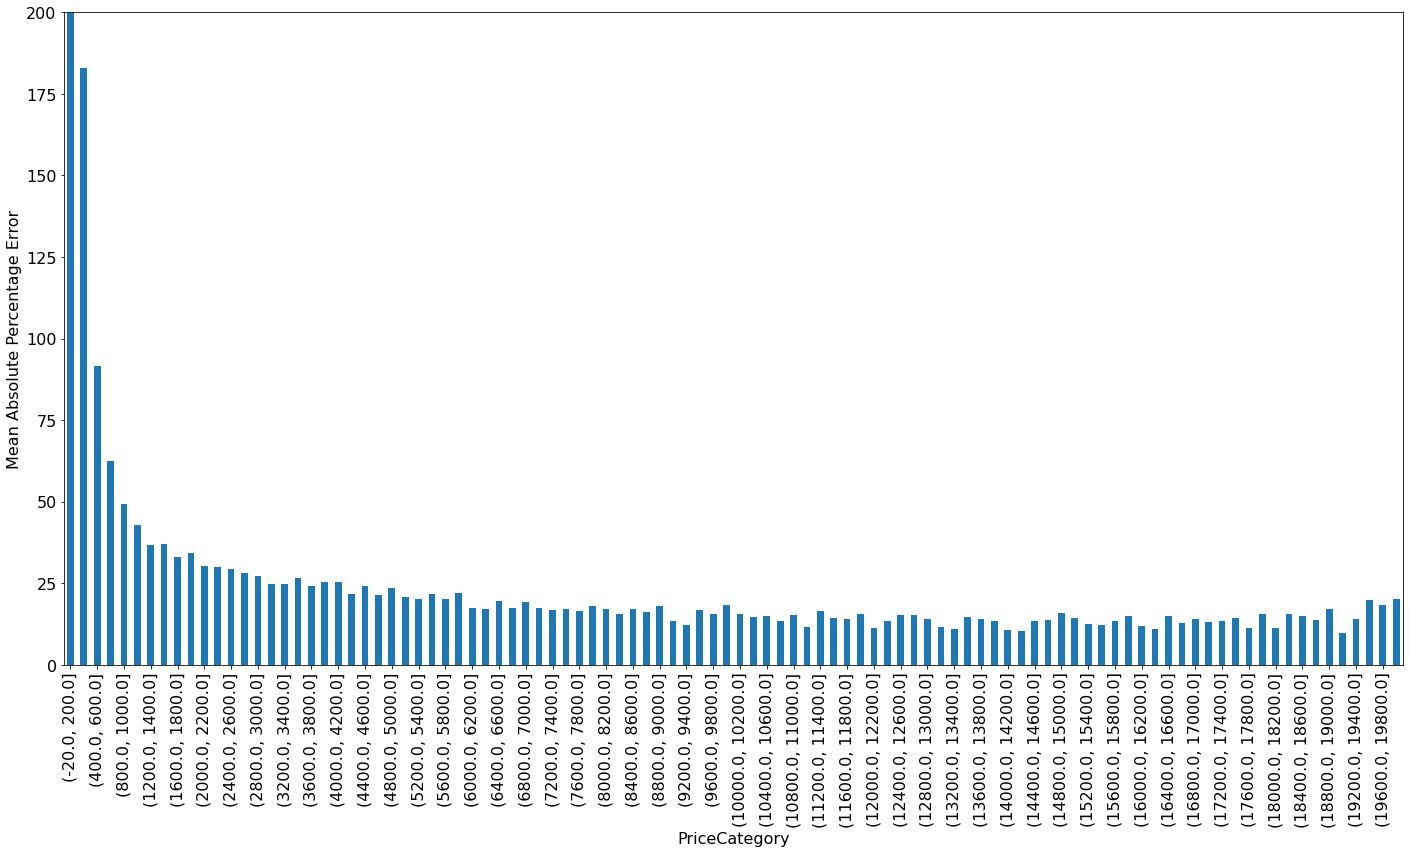

In [153]:
plt.figure(figsize=(24,12))
ErrorComparisonPrice[('AbsolutePercentageError','mean')].plot(kind='bar')
ax=plt.gca()
ax.set_ylim(0,200)
ax.set_ylabel("Mean Absolute Percentage Error", fontsize=16)
ax.xaxis.label.set_size(16)
ticks = ax.get_xticks()
t_lables = ax.get_xticklabels()
ticks = [x for i, x in enumerate(ticks) if not i%2]
t_lables = [x for i,x in enumerate(t_lables) if not i%2]
ax.set_xticks(ticks)
ax.set_xticklabels(t_lables)
ax.tick_params(labelsize=16)
plt.show()

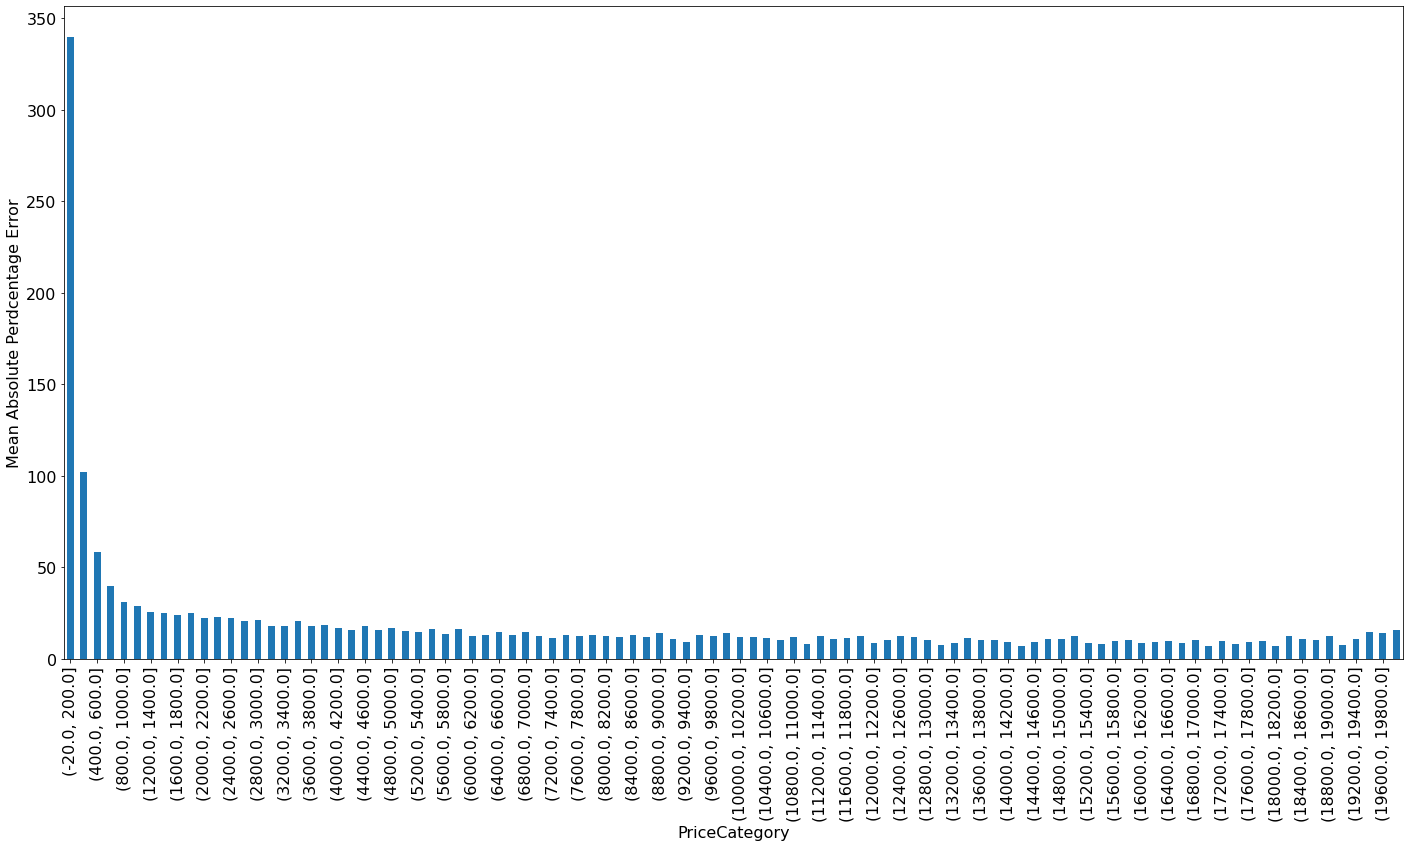

In [154]:
plt.figure(figsize=(24,12))
ErrorComparisonPrice[('AbsolutePercentageError','median')].plot(kind='bar')
ax=plt.gca()
ax.set_ylabel("Mean Absolute Perdcentage Error", fontsize=16)
ax.xaxis.label.set_size(16)
ticks = ax.get_xticks()
t_lables = ax.get_xticklabels()
ticks = [x for i, x in enumerate(ticks) if not i%2]
t_lables = [x for i,x in enumerate(t_lables) if not i%2]
ax.set_xticks(ticks)
ax.set_xticklabels(t_lables)
ax.tick_params(labelsize=16)
plt.show()

Mean and median error value increase with price, but the mean and median relative error decrease with price in low cost segment and keep stable in other segments. The worst result in mean of relative error our model gives in segment with price lower then $600$ euro. The best result it gives in segment with price between $\sim 6000$ and $\sim 19400$ euro.  


Consider distribution of our dataset by price for comparision.

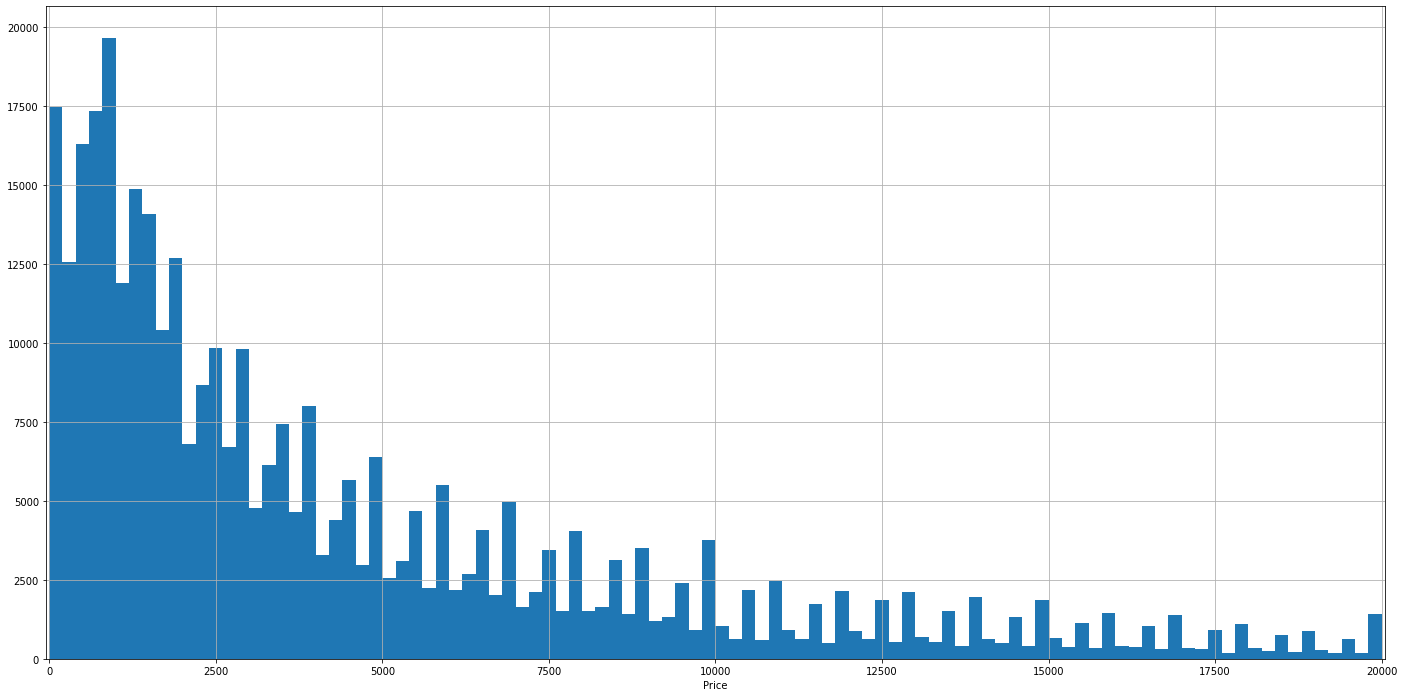

In [137]:
plt.figure(figsize=(24,12))
data['Price'].hist(bins = 100)
x=plt.gca()
x.set_xlim(-50,20050)
x.set_xlabel("Price")
plt.show()

In [138]:
data[['Price']].describe()

,Price
count,354369.000000
mean,4416.656776
std,4514.158514
min,0.000000
25%,1050.000000
50%,2700.000000
75%,6400.000000
max,20000.000000


# Conclusion

During the implementation of the project I have performed the following:


1. have analized the dataset: stadied numerical features and target feature, detected the missing values;
2. have done data preprocessing;
3. have considered several models (***Linear Regression, KNNRegressor, DecisionTreeRegressor, RandomForestRegressor and CatBoostRegressor***) and have made comparision of it's quality. The gradient boosting model ***CatBoostRegressor*** gave the best results both in **RMSE** and **Median Absolute Percentage Error** ($\sim 1753$ on cross-validation, $\sim 1760$ on test sample and $\sim 22\%$ on test sample respectively);
4. have determined the optimal hyperparameters for CatBoostRegressor using the method GridSearchCV from scikit-learn library. This allowed us to improve the quality of the model: $\sim 1710$ **RMSE**  and $\sim 21\%$ **Median Absolute Percentage Error** on test sample; **Median Absolute Error**(not relative) on test sample is $575$ euro.
5. have conducted a study of feature importance with Shapley values method. It gave the expected results: the mileage and the age have a negative impact, the power of engine and the fact that the car has not been repaired in the past and the presence of gasoline engine have a positive impact;
6. have conducted an error analysis. Mean and median error value increase with price, but the mean and median relative error decrease with price in low cost segment and keep stable in other segments. The worst result in mean of relative error our model gives in segment with price lower then $600$ euro. The best result it gives in segment with price between $\sim 6000$ and $\sim 19400$ euro.  

